# Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

import torch
import torchvision.transforms.functional as TF
from torchvision.utils import save_image

from depth_anything_3.api import DepthAnything3

[WARN ] Dependency `gsplat` is required for rendering 3DGS. Install via: pip install git+https://github.com/nerfstudio-project/gsplat.git@0b4dddf04cb687367602c01196913cde6a743d70


# Loading model

In [2]:
# Load model from Hugging Face Hub
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DepthAnything3.from_pretrained("depth-anything/DA3NESTED-GIANT-LARGE")
model = model.to(device=device)
model.eval()
print('Model loaded!')

[INFO ] using SwiGLU layer as FFN
[INFO ] using MLP layer as FFN
Model loaded!


# Toy Example

In [3]:
toy_image = ['/home/alumno/Desktop/datos/Computer Vision/depth-anything-3/CamVid/train/0001TP_009210.png']

In [4]:
toy_pred = model.inference(
    toy_image,
    process_res=960
)
print(toy_pred.depth[0].shape)
print(toy_pred.conf[0].shape)

[INFO ] Processed Images Done taking 1.961461067199707 seconds. Shape:  torch.Size([1, 3, 714, 966])
[INFO ] Model Forward Pass Done. Time: 10.77381181716919 seconds
[INFO ] Conversion to Prediction Done. Time: 0.019909381866455078 seconds
(714, 966)
(714, 966)


In [5]:
print(type(toy_pred.depth[0]))
print(type(toy_pred.conf[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
torch.cuda.is_available()

True

In [6]:
# Convert numpy array to tensor
depth_tensor = torch.from_numpy(toy_pred.depth[0])

# Add batch and channel dimensions: (H, W) -> (1, 1, H, W)
depth_tensor = depth_tensor.unsqueeze(0).unsqueeze(0)

# Resize to 720x960
resized = TF.resize(depth_tensor, size=[720, 960], antialias=True)

# Remove batch and channel dimensions: (1, 1, H, W) -> (H, W)
resized = resized.squeeze(0).squeeze(0)

# Convert back to numpy if needed
resized_numpy = resized.numpy()

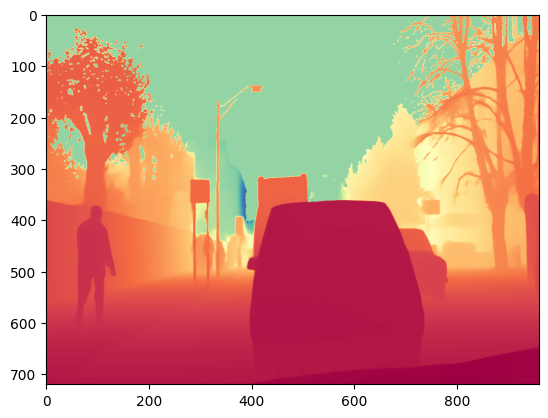

In [7]:
plt.imshow(resized_numpy, cmap='Spectral')

In [8]:
# Save as .npy file (preserves exact float values)
np.save('depth_map.npy', resized_numpy)

# Load it back later
loaded = np.load('depth_map.npy')

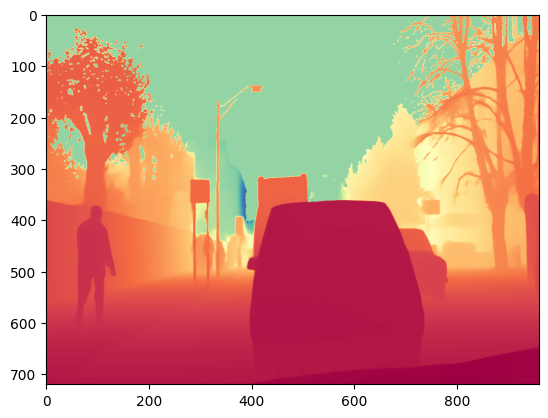

In [9]:
plt.imshow(loaded, cmap='Spectral')

# Depth maps generation

## Train split

In [10]:
INPUT_DIR = '/home/alumno/Desktop/datos/Computer Vision/depth-anything-3/CamVid/train/'
OUTPUT_DIR = '/home/alumno/Desktop/datos/Computer Vision/depth-anything-3/CamVid/train_labels/'
DEPTH_MAP_DIR = 'train_depths/'
CONFS_DIR = 'train_confs/'
IMAGES = os.listdir(INPUT_DIR)

In [11]:
for img in tqdm(IMAGES):
    pred = model.inference(
        [INPUT_DIR + img],
        process_res=960
    )

    # Convert numpy array to tensor
    depth_tensor = torch.from_numpy(pred.depth[0])
    
    # Add batch and channel dimensions: (H, W) -> (1, 1, H, W)
    depth_tensor = depth_tensor.unsqueeze(0).unsqueeze(0)
    
    # Resize to 720x960
    resized = TF.resize(depth_tensor, size=[720, 960], antialias=True)
    
    # Remove batch and channel dimensions: (1, 1, H, W) -> (H, W)
    resized = resized.squeeze(0).squeeze(0)
    
    # Convert back to numpy if needed
    resized_numpy = resized.numpy()

    np.save(OUTPUT_DIR + DEPTH_MAP_DIR + img.replace('png', 'npy'), resized_numpy)
    np.save(OUTPUT_DIR + CONFS_DIR + img.replace('png', 'npy'), pred.conf[0])

  0%|                                                   | 0/369 [00:00<?, ?it/s]

[INFO ] Processed Images Done taking 0.0686345100402832 seconds. Shape:  torch.Size([1, 3, 714, 966])


  0%|                                           | 1/369 [00:01<06:48,  1.11s/it]

[INFO ] Model Forward Pass Done. Time: 1.0100955963134766 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009052753448486328 seconds
[INFO ] Processed Images Done taking 0.05596351623535156 seconds. Shape:  torch.Size([1, 3, 714, 966])


  1%|▏                                          | 2/369 [00:01<04:22,  1.40it/s]

[INFO ] Model Forward Pass Done. Time: 0.3485381603240967 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011181831359863281 seconds
[INFO ] Processed Images Done taking 0.04610180854797363 seconds. Shape:  torch.Size([1, 3, 714, 966])


  1%|▎                                          | 3/369 [00:01<03:35,  1.70it/s]

[INFO ] Model Forward Pass Done. Time: 0.3489866256713867 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009694099426269531 seconds
[INFO ] Processed Images Done taking 0.049944162368774414 seconds. Shape:  torch.Size([1, 3, 714, 966])


  1%|▍                                          | 4/369 [00:02<03:11,  1.90it/s]

[INFO ] Model Forward Pass Done. Time: 0.3483004570007324 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009059906005859375 seconds
[INFO ] Processed Images Done taking 0.04494476318359375 seconds. Shape:  torch.Size([1, 3, 714, 966])


  1%|▌                                          | 5/369 [00:02<02:59,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.34865403175354004 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008966922760009766 seconds
[INFO ] Processed Images Done taking 0.045473337173461914 seconds. Shape:  torch.Size([1, 3, 714, 966])


  2%|▋                                          | 6/369 [00:03<02:50,  2.13it/s]

[INFO ] Model Forward Pass Done. Time: 0.34728550910949707 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009660720825195312 seconds
[INFO ] Processed Images Done taking 0.04775261878967285 seconds. Shape:  torch.Size([1, 3, 714, 966])


  2%|▊                                          | 7/369 [00:03<02:45,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.347609281539917 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010352134704589844 seconds
[INFO ] Processed Images Done taking 0.3590860366821289 seconds. Shape:  torch.Size([1, 3, 714, 966])


  2%|▉                                          | 8/369 [00:04<03:25,  1.75it/s]

[INFO ] Model Forward Pass Done. Time: 0.3459649085998535 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008952617645263672 seconds
[INFO ] Processed Images Done taking 0.09608221054077148 seconds. Shape:  torch.Size([1, 3, 714, 966])


  2%|█                                          | 9/369 [00:04<03:14,  1.85it/s]

[INFO ] Model Forward Pass Done. Time: 0.3458590507507324 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008454322814941406 seconds
[INFO ] Processed Images Done taking 0.048497676849365234 seconds. Shape:  torch.Size([1, 3, 714, 966])


  3%|█▏                                        | 10/369 [00:05<03:01,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.34629178047180176 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009984970092773438 seconds
[INFO ] Processed Images Done taking 0.04469490051269531 seconds. Shape:  torch.Size([1, 3, 714, 966])


  3%|█▎                                        | 11/369 [00:05<02:51,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.34644603729248047 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009131431579589844 seconds
[INFO ] Processed Images Done taking 0.04725790023803711 seconds. Shape:  torch.Size([1, 3, 714, 966])


  3%|█▎                                        | 12/369 [00:06<02:45,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.3460690975189209 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009272098541259766 seconds
[INFO ] Processed Images Done taking 0.04752397537231445 seconds. Shape:  torch.Size([1, 3, 714, 966])


  4%|█▍                                        | 13/369 [00:06<02:40,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.3465754985809326 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009353160858154297 seconds
[INFO ] Processed Images Done taking 0.0833427906036377 seconds. Shape:  torch.Size([1, 3, 714, 966])


  4%|█▌                                        | 14/369 [00:07<02:41,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.346358060836792 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008502006530761719 seconds
[INFO ] Processed Images Done taking 0.05266165733337402 seconds. Shape:  torch.Size([1, 3, 714, 966])


  4%|█▋                                        | 15/369 [00:07<02:38,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.3466925621032715 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009450912475585938 seconds
[INFO ] Processed Images Done taking 0.05899381637573242 seconds. Shape:  torch.Size([1, 3, 714, 966])


  4%|█▊                                        | 16/369 [00:08<02:38,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.3469662666320801 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008838176727294922 seconds
[INFO ] Processed Images Done taking 0.11696791648864746 seconds. Shape:  torch.Size([1, 3, 714, 966])


  5%|█▉                                        | 17/369 [00:08<02:42,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.3467142581939697 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008528232574462891 seconds
[INFO ] Processed Images Done taking 0.04095339775085449 seconds. Shape:  torch.Size([1, 3, 714, 966])


  5%|██                                        | 18/369 [00:08<02:37,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.3485279083251953 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011360645294189453 seconds
[INFO ] Processed Images Done taking 0.19746160507202148 seconds. Shape:  torch.Size([1, 3, 714, 966])


  5%|██▏                                       | 19/369 [00:09<02:59,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.34680724143981934 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010671615600585938 seconds
[INFO ] Processed Images Done taking 0.04985785484313965 seconds. Shape:  torch.Size([1, 3, 714, 966])


  5%|██▎                                       | 20/369 [00:10<02:50,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.34843921661376953 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0021011829376220703 seconds
[INFO ] Processed Images Done taking 0.04937171936035156 seconds. Shape:  torch.Size([1, 3, 714, 966])


  6%|██▍                                       | 21/369 [00:10<02:43,  2.13it/s]

[INFO ] Model Forward Pass Done. Time: 0.3470489978790283 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009033679962158203 seconds
[INFO ] Processed Images Done taking 0.04756808280944824 seconds. Shape:  torch.Size([1, 3, 714, 966])


  6%|██▌                                       | 22/369 [00:10<02:39,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.34752488136291504 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011739730834960938 seconds
[INFO ] Processed Images Done taking 0.04699873924255371 seconds. Shape:  torch.Size([1, 3, 714, 966])


  6%|██▌                                       | 23/369 [00:11<02:37,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.3476414680480957 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012545585632324219 seconds
[INFO ] Processed Images Done taking 0.08156728744506836 seconds. Shape:  torch.Size([1, 3, 714, 966])


  7%|██▋                                       | 24/369 [00:11<02:37,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.34795308113098145 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010480880737304688 seconds
[INFO ] Processed Images Done taking 0.04968070983886719 seconds. Shape:  torch.Size([1, 3, 714, 966])


  7%|██▊                                       | 25/369 [00:12<02:34,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.34803223609924316 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011379718780517578 seconds
[INFO ] Processed Images Done taking 0.0523984432220459 seconds. Shape:  torch.Size([1, 3, 714, 966])


  7%|██▉                                       | 26/369 [00:12<02:32,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.349318265914917 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015366077423095703 seconds
[INFO ] Processed Images Done taking 0.04840230941772461 seconds. Shape:  torch.Size([1, 3, 714, 966])


  7%|███                                       | 27/369 [00:13<02:30,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.34835028648376465 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012896060943603516 seconds
[INFO ] Processed Images Done taking 0.04791903495788574 seconds. Shape:  torch.Size([1, 3, 714, 966])


  8%|███▏                                      | 28/369 [00:13<02:28,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.34841179847717285 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016624927520751953 seconds
[INFO ] Processed Images Done taking 0.07080745697021484 seconds. Shape:  torch.Size([1, 3, 714, 966])


  8%|███▎                                      | 29/369 [00:13<02:29,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.34839415550231934 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008628368377685547 seconds
[INFO ] Processed Images Done taking 0.05677509307861328 seconds. Shape:  torch.Size([1, 3, 714, 966])


  8%|███▍                                      | 30/369 [00:14<02:29,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.34874510765075684 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001628875732421875 seconds
[INFO ] Processed Images Done taking 0.07189798355102539 seconds. Shape:  torch.Size([1, 3, 714, 966])


  8%|███▌                                      | 31/369 [00:14<02:30,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.34880781173706055 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009202957153320312 seconds
[INFO ] Processed Images Done taking 0.07266592979431152 seconds. Shape:  torch.Size([1, 3, 714, 966])


  9%|███▋                                      | 32/369 [00:15<02:30,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.3480339050292969 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011947154998779297 seconds
[INFO ] Processed Images Done taking 0.04805302619934082 seconds. Shape:  torch.Size([1, 3, 714, 966])


  9%|███▊                                      | 33/369 [00:15<02:29,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.3489236831665039 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009074211120605469 seconds
[INFO ] Processed Images Done taking 0.046994924545288086 seconds. Shape:  torch.Size([1, 3, 714, 966])


  9%|███▊                                      | 34/369 [00:16<02:27,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.3485255241394043 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012454986572265625 seconds
[INFO ] Processed Images Done taking 0.054749488830566406 seconds. Shape:  torch.Size([1, 3, 714, 966])


  9%|███▉                                      | 35/369 [00:16<02:26,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.34903860092163086 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00110626220703125 seconds
[INFO ] Processed Images Done taking 0.05110573768615723 seconds. Shape:  torch.Size([1, 3, 714, 966])


 10%|████                                      | 36/369 [00:17<02:25,  2.29it/s]

[INFO ] Model Forward Pass Done. Time: 0.34824228286743164 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009267330169677734 seconds
[INFO ] Processed Images Done taking 0.048279523849487305 seconds. Shape:  torch.Size([1, 3, 714, 966])


 10%|████▏                                     | 37/369 [00:17<02:24,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.3487887382507324 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010981559753417969 seconds
[INFO ] Processed Images Done taking 0.04279351234436035 seconds. Shape:  torch.Size([1, 3, 714, 966])


 10%|████▎                                     | 38/369 [00:17<02:22,  2.32it/s]

[INFO ] Model Forward Pass Done. Time: 0.3485710620880127 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0021278858184814453 seconds
[INFO ] Processed Images Done taking 0.08751583099365234 seconds. Shape:  torch.Size([1, 3, 714, 966])


 11%|████▍                                     | 39/369 [00:18<02:26,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.34905552864074707 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013842582702636719 seconds
[INFO ] Processed Images Done taking 0.05340409278869629 seconds. Shape:  torch.Size([1, 3, 714, 966])


 11%|████▌                                     | 40/369 [00:18<02:25,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.3488435745239258 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016982555389404297 seconds
[INFO ] Processed Images Done taking 0.047574758529663086 seconds. Shape:  torch.Size([1, 3, 714, 966])


 11%|████▋                                     | 41/369 [00:19<02:24,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.3483765125274658 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010080337524414062 seconds
[INFO ] Processed Images Done taking 0.06650590896606445 seconds. Shape:  torch.Size([1, 3, 714, 966])


 11%|████▊                                     | 42/369 [00:19<02:24,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.3492918014526367 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001661539077758789 seconds
[INFO ] Processed Images Done taking 0.09079480171203613 seconds. Shape:  torch.Size([1, 3, 714, 966])


 12%|████▉                                     | 43/369 [00:20<02:42,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.3492264747619629 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010132789611816406 seconds
[INFO ] Processed Images Done taking 0.053498268127441406 seconds. Shape:  torch.Size([1, 3, 714, 966])


 12%|█████                                     | 44/369 [00:20<02:37,  2.07it/s]

[INFO ] Model Forward Pass Done. Time: 0.349149227142334 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010826587677001953 seconds
[INFO ] Processed Images Done taking 0.05599045753479004 seconds. Shape:  torch.Size([1, 3, 714, 966])


 12%|█████                                     | 45/369 [00:21<02:32,  2.13it/s]

[INFO ] Model Forward Pass Done. Time: 0.34836626052856445 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009191036224365234 seconds
[INFO ] Processed Images Done taking 0.053589820861816406 seconds. Shape:  torch.Size([1, 3, 714, 966])


 12%|█████▏                                    | 46/369 [00:21<02:28,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.34845876693725586 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008993148803710938 seconds
[INFO ] Processed Images Done taking 0.04356551170349121 seconds. Shape:  torch.Size([1, 3, 714, 966])


 13%|█████▎                                    | 47/369 [00:22<02:24,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.34938549995422363 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018305778503417969 seconds
[INFO ] Processed Images Done taking 0.04993939399719238 seconds. Shape:  torch.Size([1, 3, 714, 966])


 13%|█████▍                                    | 48/369 [00:22<02:23,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.34698009490966797 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0022721290588378906 seconds
[INFO ] Processed Images Done taking 0.10890412330627441 seconds. Shape:  torch.Size([1, 3, 714, 966])


 13%|█████▌                                    | 49/369 [00:23<02:26,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.34635233879089355 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009505748748779297 seconds
[INFO ] Processed Images Done taking 0.04670357704162598 seconds. Shape:  torch.Size([1, 3, 714, 966])


 14%|█████▋                                    | 50/369 [00:23<02:22,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.34640979766845703 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009522438049316406 seconds
[INFO ] Processed Images Done taking 0.04999995231628418 seconds. Shape:  torch.Size([1, 3, 714, 966])


 14%|█████▊                                    | 51/369 [00:23<02:20,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.3464982509613037 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009016990661621094 seconds
[INFO ] Processed Images Done taking 0.04253864288330078 seconds. Shape:  torch.Size([1, 3, 714, 966])


 14%|█████▉                                    | 52/369 [00:24<02:17,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.3465156555175781 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008606910705566406 seconds
[INFO ] Processed Images Done taking 0.04615426063537598 seconds. Shape:  torch.Size([1, 3, 714, 966])


 14%|██████                                    | 53/369 [00:24<02:16,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.34627461433410645 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008633136749267578 seconds
[INFO ] Processed Images Done taking 0.05487823486328125 seconds. Shape:  torch.Size([1, 3, 714, 966])


 15%|██████▏                                   | 54/369 [00:25<02:16,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.3470759391784668 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001924753189086914 seconds
[INFO ] Processed Images Done taking 0.04235386848449707 seconds. Shape:  torch.Size([1, 3, 714, 966])


 15%|██████▎                                   | 55/369 [00:25<02:14,  2.33it/s]

[INFO ] Model Forward Pass Done. Time: 0.3460979461669922 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010557174682617188 seconds
[INFO ] Processed Images Done taking 0.05419445037841797 seconds. Shape:  torch.Size([1, 3, 714, 966])


 15%|██████▎                                   | 56/369 [00:26<02:15,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.345919132232666 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008480548858642578 seconds
[INFO ] Processed Images Done taking 0.07745647430419922 seconds. Shape:  torch.Size([1, 3, 714, 966])


 15%|██████▍                                   | 57/369 [00:26<02:18,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.34641289710998535 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00104522705078125 seconds
[INFO ] Processed Images Done taking 0.05023789405822754 seconds. Shape:  torch.Size([1, 3, 714, 966])


 16%|██████▌                                   | 58/369 [00:26<02:16,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.3468034267425537 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015473365783691406 seconds
[INFO ] Processed Images Done taking 0.055211782455444336 seconds. Shape:  torch.Size([1, 3, 714, 966])


 16%|██████▋                                   | 59/369 [00:27<02:15,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.34622716903686523 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008699893951416016 seconds
[INFO ] Processed Images Done taking 0.0645904541015625 seconds. Shape:  torch.Size([1, 3, 714, 966])


 16%|██████▊                                   | 60/369 [00:27<02:15,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.3459010124206543 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008630752563476562 seconds
[INFO ] Processed Images Done taking 0.07277584075927734 seconds. Shape:  torch.Size([1, 3, 714, 966])


 17%|██████▉                                   | 61/369 [00:28<02:16,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.34652137756347656 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011708736419677734 seconds
[INFO ] Processed Images Done taking 0.057251691818237305 seconds. Shape:  torch.Size([1, 3, 714, 966])


 17%|███████                                   | 62/369 [00:28<02:16,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.3482379913330078 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018978118896484375 seconds
[INFO ] Processed Images Done taking 0.06391239166259766 seconds. Shape:  torch.Size([1, 3, 714, 966])


 17%|███████▏                                  | 63/369 [00:29<02:16,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.3460831642150879 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008721351623535156 seconds
[INFO ] Processed Images Done taking 0.052196502685546875 seconds. Shape:  torch.Size([1, 3, 714, 966])


 17%|███████▎                                  | 64/369 [00:29<02:14,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.348543643951416 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010013580322265625 seconds
[INFO ] Processed Images Done taking 0.03670930862426758 seconds. Shape:  torch.Size([1, 3, 714, 966])


 18%|███████▍                                  | 65/369 [00:29<02:11,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.34688735008239746 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008852481842041016 seconds
[INFO ] Processed Images Done taking 0.04819083213806152 seconds. Shape:  torch.Size([1, 3, 714, 966])


 18%|███████▌                                  | 66/369 [00:30<02:19,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.3467233180999756 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012116432189941406 seconds
[INFO ] Processed Images Done taking 0.06782889366149902 seconds. Shape:  torch.Size([1, 3, 714, 966])


 18%|███████▋                                  | 67/369 [00:30<02:17,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.34606075286865234 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009546279907226562 seconds
[INFO ] Processed Images Done taking 0.044831037521362305 seconds. Shape:  torch.Size([1, 3, 714, 966])


 18%|███████▋                                  | 68/369 [00:31<02:14,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.3467745780944824 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009200572967529297 seconds
[INFO ] Processed Images Done taking 0.04636740684509277 seconds. Shape:  torch.Size([1, 3, 714, 966])


 19%|███████▊                                  | 69/369 [00:31<02:12,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.34657835960388184 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008690357208251953 seconds
[INFO ] Processed Images Done taking 0.04494881629943848 seconds. Shape:  torch.Size([1, 3, 714, 966])


 19%|███████▉                                  | 70/369 [00:32<02:10,  2.29it/s]

[INFO ] Model Forward Pass Done. Time: 0.3466637134552002 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008616447448730469 seconds
[INFO ] Processed Images Done taking 0.04582548141479492 seconds. Shape:  torch.Size([1, 3, 714, 966])


 19%|████████                                  | 71/369 [00:32<02:10,  2.29it/s]

[INFO ] Model Forward Pass Done. Time: 0.3470947742462158 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009210109710693359 seconds
[INFO ] Processed Images Done taking 0.07874894142150879 seconds. Shape:  torch.Size([1, 3, 714, 966])


 20%|████████▏                                 | 72/369 [00:33<02:11,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.34653711318969727 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014595985412597656 seconds
[INFO ] Processed Images Done taking 0.05332803726196289 seconds. Shape:  torch.Size([1, 3, 714, 966])


 20%|████████▎                                 | 73/369 [00:33<02:10,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.34723353385925293 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016732215881347656 seconds
[INFO ] Processed Images Done taking 0.0847480297088623 seconds. Shape:  torch.Size([1, 3, 714, 966])


 20%|████████▍                                 | 74/369 [00:34<02:11,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.34693026542663574 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008914470672607422 seconds
[INFO ] Processed Images Done taking 0.04964184761047363 seconds. Shape:  torch.Size([1, 3, 714, 966])


 20%|████████▌                                 | 75/369 [00:34<02:09,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.34678125381469727 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001088857650756836 seconds
[INFO ] Processed Images Done taking 0.05443978309631348 seconds. Shape:  torch.Size([1, 3, 714, 966])


 21%|████████▋                                 | 76/369 [00:34<02:08,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.34763479232788086 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00086212158203125 seconds
[INFO ] Processed Images Done taking 0.05404186248779297 seconds. Shape:  torch.Size([1, 3, 714, 966])


 21%|████████▊                                 | 77/369 [00:35<02:07,  2.29it/s]

[INFO ] Model Forward Pass Done. Time: 0.3479020595550537 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015327930450439453 seconds
[INFO ] Processed Images Done taking 0.13846039772033691 seconds. Shape:  torch.Size([1, 3, 714, 966])


 21%|████████▉                                 | 78/369 [00:35<02:15,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.3476872444152832 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012521743774414062 seconds
[INFO ] Processed Images Done taking 0.10098576545715332 seconds. Shape:  torch.Size([1, 3, 714, 966])


 21%|████████▉                                 | 79/369 [00:36<02:17,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.34738588333129883 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0006911754608154297 seconds
[INFO ] Processed Images Done taking 0.1330270767211914 seconds. Shape:  torch.Size([1, 3, 714, 966])


 22%|█████████                                 | 80/369 [00:36<02:21,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.34879469871520996 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012192726135253906 seconds
[INFO ] Processed Images Done taking 0.0631253719329834 seconds. Shape:  torch.Size([1, 3, 714, 966])


 22%|█████████▏                                | 81/369 [00:37<02:16,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.3483424186706543 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018267631530761719 seconds
[INFO ] Processed Images Done taking 0.05756735801696777 seconds. Shape:  torch.Size([1, 3, 714, 966])


 22%|█████████▎                                | 82/369 [00:37<02:13,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.34721922874450684 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018405914306640625 seconds
[INFO ] Processed Images Done taking 0.13047003746032715 seconds. Shape:  torch.Size([1, 3, 714, 966])


 22%|█████████▍                                | 83/369 [00:38<02:17,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.3479647636413574 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016894340515136719 seconds
[INFO ] Processed Images Done taking 0.058508872985839844 seconds. Shape:  torch.Size([1, 3, 714, 966])


 23%|█████████▌                                | 84/369 [00:38<02:13,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.34882688522338867 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009512901306152344 seconds
[INFO ] Processed Images Done taking 0.055846452713012695 seconds. Shape:  torch.Size([1, 3, 714, 966])


 23%|█████████▋                                | 85/369 [00:39<02:10,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.34917593002319336 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001417398452758789 seconds
[INFO ] Processed Images Done taking 0.04000353813171387 seconds. Shape:  torch.Size([1, 3, 714, 966])


 23%|█████████▊                                | 86/369 [00:39<02:06,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.3505520820617676 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011792182922363281 seconds
[INFO ] Processed Images Done taking 0.10849690437316895 seconds. Shape:  torch.Size([1, 3, 714, 966])


 24%|█████████▉                                | 87/369 [00:40<02:09,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.34924983978271484 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009160041809082031 seconds
[INFO ] Processed Images Done taking 0.04108548164367676 seconds. Shape:  torch.Size([1, 3, 714, 966])


 24%|██████████                                | 88/369 [00:40<02:14,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.349872350692749 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008394718170166016 seconds
[INFO ] Processed Images Done taking 0.060260772705078125 seconds. Shape:  torch.Size([1, 3, 714, 966])


 24%|██████████▏                               | 89/369 [00:41<02:10,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.3499581813812256 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001538991928100586 seconds
[INFO ] Processed Images Done taking 0.03774118423461914 seconds. Shape:  torch.Size([1, 3, 714, 966])


 24%|██████████▏                               | 90/369 [00:41<02:06,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.3493614196777344 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009584426879882812 seconds
[INFO ] Processed Images Done taking 0.03432440757751465 seconds. Shape:  torch.Size([1, 3, 714, 966])


 25%|██████████▎                               | 91/369 [00:41<02:02,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.3487265110015869 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009107589721679688 seconds
[INFO ] Processed Images Done taking 0.03905534744262695 seconds. Shape:  torch.Size([1, 3, 714, 966])


 25%|██████████▍                               | 92/369 [00:42<02:00,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.34851884841918945 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008924007415771484 seconds
[INFO ] Processed Images Done taking 0.046053409576416016 seconds. Shape:  torch.Size([1, 3, 714, 966])


 25%|██████████▌                               | 93/369 [00:42<01:59,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.3502333164215088 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008664131164550781 seconds
[INFO ] Processed Images Done taking 0.046584367752075195 seconds. Shape:  torch.Size([1, 3, 714, 966])


 25%|██████████▋                               | 94/369 [00:43<01:58,  2.32it/s]

[INFO ] Model Forward Pass Done. Time: 0.34891271591186523 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008604526519775391 seconds
[INFO ] Processed Images Done taking 0.045440673828125 seconds. Shape:  torch.Size([1, 3, 714, 966])


 26%|██████████▊                               | 95/369 [00:43<01:57,  2.33it/s]

[INFO ] Model Forward Pass Done. Time: 0.3485679626464844 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009431838989257812 seconds
[INFO ] Processed Images Done taking 0.10784912109375 seconds. Shape:  torch.Size([1, 3, 714, 966])


 26%|██████████▉                               | 96/369 [00:44<02:02,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.35025501251220703 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010647773742675781 seconds
[INFO ] Processed Images Done taking 0.039450883865356445 seconds. Shape:  torch.Size([1, 3, 714, 966])


 26%|███████████                               | 97/369 [00:44<01:59,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.3491852283477783 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009381771087646484 seconds
[INFO ] Processed Images Done taking 0.04225802421569824 seconds. Shape:  torch.Size([1, 3, 714, 966])


 27%|███████████▏                              | 98/369 [00:44<01:57,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.3494586944580078 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009260177612304688 seconds
[INFO ] Processed Images Done taking 0.05082559585571289 seconds. Shape:  torch.Size([1, 3, 714, 966])


 27%|███████████▎                              | 99/369 [00:45<01:57,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.3503720760345459 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0023102760314941406 seconds
[INFO ] Processed Images Done taking 0.04368448257446289 seconds. Shape:  torch.Size([1, 3, 714, 966])


 27%|███████████                              | 100/369 [00:45<02:00,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.3496065139770508 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009522438049316406 seconds
[INFO ] Processed Images Done taking 0.2725820541381836 seconds. Shape:  torch.Size([1, 3, 714, 966])


 27%|███████████▏                             | 101/369 [00:46<02:17,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.3498096466064453 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010085105895996094 seconds
[INFO ] Processed Images Done taking 0.08852624893188477 seconds. Shape:  torch.Size([1, 3, 714, 966])


 28%|███████████▎                             | 102/369 [00:46<02:13,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.34949493408203125 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010404586791992188 seconds
[INFO ] Processed Images Done taking 0.0536801815032959 seconds. Shape:  torch.Size([1, 3, 714, 966])


 28%|███████████▍                             | 103/369 [00:47<02:08,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.3489246368408203 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008656978607177734 seconds
[INFO ] Processed Images Done taking 0.043106794357299805 seconds. Shape:  torch.Size([1, 3, 714, 966])


 28%|███████████▌                             | 104/369 [00:47<02:03,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.3496115207672119 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008654594421386719 seconds
[INFO ] Processed Images Done taking 0.03585052490234375 seconds. Shape:  torch.Size([1, 3, 714, 966])


 28%|███████████▋                             | 105/369 [00:48<01:58,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.34999799728393555 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012257099151611328 seconds
[INFO ] Processed Images Done taking 0.051763057708740234 seconds. Shape:  torch.Size([1, 3, 714, 966])


 29%|███████████▊                             | 106/369 [00:48<01:57,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.34980058670043945 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008676052093505859 seconds
[INFO ] Processed Images Done taking 0.09330940246582031 seconds. Shape:  torch.Size([1, 3, 714, 966])


 29%|███████████▉                             | 107/369 [00:49<01:58,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.35047149658203125 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0021610260009765625 seconds
[INFO ] Processed Images Done taking 0.056511640548706055 seconds. Shape:  torch.Size([1, 3, 714, 966])


 29%|████████████                             | 108/369 [00:49<01:56,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.3493971824645996 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009124279022216797 seconds
[INFO ] Processed Images Done taking 0.04548954963684082 seconds. Shape:  torch.Size([1, 3, 714, 966])


 30%|████████████                             | 109/369 [00:49<01:56,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.3530886173248291 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015015602111816406 seconds
[INFO ] Processed Images Done taking 0.09560298919677734 seconds. Shape:  torch.Size([1, 3, 714, 966])


 30%|████████████▏                            | 110/369 [00:50<01:58,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.34947633743286133 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011470317840576172 seconds
[INFO ] Processed Images Done taking 0.05144500732421875 seconds. Shape:  torch.Size([1, 3, 714, 966])


 30%|████████████▎                            | 111/369 [00:50<02:01,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.34954261779785156 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015606880187988281 seconds
[INFO ] Processed Images Done taking 0.06173300743103027 seconds. Shape:  torch.Size([1, 3, 714, 966])


 30%|████████████▍                            | 112/369 [00:51<01:59,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.34968113899230957 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009148120880126953 seconds
[INFO ] Processed Images Done taking 0.0545346736907959 seconds. Shape:  torch.Size([1, 3, 714, 966])


 31%|████████████▌                            | 113/369 [00:51<01:56,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.34925413131713867 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009553432464599609 seconds
[INFO ] Processed Images Done taking 0.04532504081726074 seconds. Shape:  torch.Size([1, 3, 714, 966])


 31%|████████████▋                            | 114/369 [00:52<01:53,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.34957003593444824 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009682178497314453 seconds
[INFO ] Processed Images Done taking 0.06977391242980957 seconds. Shape:  torch.Size([1, 3, 714, 966])


 31%|████████████▊                            | 115/369 [00:52<01:53,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.3491995334625244 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008635520935058594 seconds
[INFO ] Processed Images Done taking 0.05999946594238281 seconds. Shape:  torch.Size([1, 3, 714, 966])


 31%|████████████▉                            | 116/369 [00:53<01:52,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.34895873069763184 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008678436279296875 seconds
[INFO ] Processed Images Done taking 0.04544711112976074 seconds. Shape:  torch.Size([1, 3, 714, 966])


 32%|█████████████                            | 117/369 [00:53<01:50,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.3491029739379883 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008544921875 seconds
[INFO ] Processed Images Done taking 0.04254961013793945 seconds. Shape:  torch.Size([1, 3, 714, 966])


 32%|█████████████                            | 118/369 [00:54<01:48,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.3496367931365967 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001028299331665039 seconds
[INFO ] Processed Images Done taking 0.04970192909240723 seconds. Shape:  torch.Size([1, 3, 714, 966])


 32%|█████████████▏                           | 119/369 [00:54<01:48,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.3498847484588623 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016164779663085938 seconds
[INFO ] Processed Images Done taking 0.04133749008178711 seconds. Shape:  torch.Size([1, 3, 714, 966])


 33%|█████████████▎                           | 120/369 [00:54<01:46,  2.33it/s]

[INFO ] Model Forward Pass Done. Time: 0.34967947006225586 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008952617645263672 seconds
[INFO ] Processed Images Done taking 0.0368962287902832 seconds. Shape:  torch.Size([1, 3, 714, 966])


 33%|█████████████▍                           | 121/369 [00:55<01:45,  2.35it/s]

[INFO ] Model Forward Pass Done. Time: 0.3501930236816406 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010292530059814453 seconds
[INFO ] Processed Images Done taking 0.045122385025024414 seconds. Shape:  torch.Size([1, 3, 714, 966])


 33%|█████████████▌                           | 122/369 [00:55<01:45,  2.35it/s]

[INFO ] Model Forward Pass Done. Time: 0.3491189479827881 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008337497711181641 seconds
[INFO ] Processed Images Done taking 0.07086467742919922 seconds. Shape:  torch.Size([1, 3, 714, 966])


 33%|█████████████▋                           | 123/369 [00:56<01:53,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.3509409427642822 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017385482788085938 seconds
[INFO ] Processed Images Done taking 0.058968305587768555 seconds. Shape:  torch.Size([1, 3, 714, 966])


 34%|█████████████▊                           | 124/369 [00:56<01:51,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.35005688667297363 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008873939514160156 seconds
[INFO ] Processed Images Done taking 0.04208803176879883 seconds. Shape:  torch.Size([1, 3, 714, 966])


 34%|█████████████▉                           | 125/369 [00:57<01:48,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.3501005172729492 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010809898376464844 seconds
[INFO ] Processed Images Done taking 0.05001497268676758 seconds. Shape:  torch.Size([1, 3, 714, 966])


 34%|██████████████                           | 126/369 [00:57<01:47,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.3503859043121338 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010232925415039062 seconds
[INFO ] Processed Images Done taking 0.03848385810852051 seconds. Shape:  torch.Size([1, 3, 714, 966])


 34%|██████████████                           | 127/369 [00:57<01:46,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.3489670753479004 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008547306060791016 seconds
[INFO ] Processed Images Done taking 0.03848743438720703 seconds. Shape:  torch.Size([1, 3, 714, 966])


 35%|██████████████▏                          | 128/369 [00:58<01:44,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.34971022605895996 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008668899536132812 seconds
[INFO ] Processed Images Done taking 0.048012733459472656 seconds. Shape:  torch.Size([1, 3, 714, 966])


 35%|██████████████▎                          | 129/369 [00:58<01:43,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.34941673278808594 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009982585906982422 seconds
[INFO ] Processed Images Done taking 0.05235695838928223 seconds. Shape:  torch.Size([1, 3, 714, 966])


 35%|██████████████▍                          | 130/369 [00:59<01:43,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.3504602909088135 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009064674377441406 seconds
[INFO ] Processed Images Done taking 0.055121421813964844 seconds. Shape:  torch.Size([1, 3, 714, 966])


 36%|██████████████▌                          | 131/369 [00:59<01:43,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.35071396827697754 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009400844573974609 seconds
[INFO ] Processed Images Done taking 0.04777669906616211 seconds. Shape:  torch.Size([1, 3, 714, 966])


 36%|██████████████▋                          | 132/369 [01:00<01:42,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.3505282402038574 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010199546813964844 seconds
[INFO ] Processed Images Done taking 0.07632708549499512 seconds. Shape:  torch.Size([1, 3, 714, 966])


 36%|██████████████▊                          | 133/369 [01:00<01:45,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.3507497310638428 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009946823120117188 seconds
[INFO ] Processed Images Done taking 0.09022998809814453 seconds. Shape:  torch.Size([1, 3, 714, 966])


 36%|██████████████▉                          | 134/369 [01:01<01:46,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.3509397506713867 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011997222900390625 seconds
[INFO ] Processed Images Done taking 0.04396486282348633 seconds. Shape:  torch.Size([1, 3, 714, 966])


 37%|███████████████                          | 135/369 [01:01<01:45,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.3654911518096924 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0028371810913085938 seconds
[INFO ] Processed Images Done taking 0.053070068359375 seconds. Shape:  torch.Size([1, 3, 714, 966])


 37%|███████████████                          | 136/369 [01:01<01:44,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.3536410331726074 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009157657623291016 seconds
[INFO ] Processed Images Done taking 0.0473017692565918 seconds. Shape:  torch.Size([1, 3, 714, 966])


 37%|███████████████▏                         | 137/369 [01:02<01:42,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.3504970073699951 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007259845733642578 seconds
[INFO ] Processed Images Done taking 0.05190563201904297 seconds. Shape:  torch.Size([1, 3, 714, 966])


 37%|███████████████▎                         | 138/369 [01:02<01:41,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.3506178855895996 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009219646453857422 seconds
[INFO ] Processed Images Done taking 0.04043149948120117 seconds. Shape:  torch.Size([1, 3, 714, 966])


 38%|███████████████▍                         | 139/369 [01:03<01:39,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.3504769802093506 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008840560913085938 seconds
[INFO ] Processed Images Done taking 0.047312259674072266 seconds. Shape:  torch.Size([1, 3, 714, 966])


 38%|███████████████▌                         | 140/369 [01:03<01:39,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.3505210876464844 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010449886322021484 seconds
[INFO ] Processed Images Done taking 0.05374860763549805 seconds. Shape:  torch.Size([1, 3, 714, 966])


 38%|███████████████▋                         | 141/369 [01:04<01:38,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.35207581520080566 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008394718170166016 seconds
[INFO ] Processed Images Done taking 0.048093318939208984 seconds. Shape:  torch.Size([1, 3, 714, 966])


 38%|███████████████▊                         | 142/369 [01:04<01:38,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.35191917419433594 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009586811065673828 seconds
[INFO ] Processed Images Done taking 0.07977747917175293 seconds. Shape:  torch.Size([1, 3, 714, 966])


 39%|███████████████▉                         | 143/369 [01:05<01:39,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.3504447937011719 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0006890296936035156 seconds
[INFO ] Processed Images Done taking 0.0984640121459961 seconds. Shape:  torch.Size([1, 3, 714, 966])


 39%|████████████████                         | 144/369 [01:05<01:44,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.3512227535247803 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0006964206695556641 seconds
[INFO ] Processed Images Done taking 0.05487394332885742 seconds. Shape:  torch.Size([1, 3, 714, 966])


 39%|████████████████                         | 145/369 [01:05<01:42,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.35069775581359863 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009822845458984375 seconds
[INFO ] Processed Images Done taking 0.04358983039855957 seconds. Shape:  torch.Size([1, 3, 714, 966])


 40%|████████████████▏                        | 146/369 [01:06<01:40,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.35111260414123535 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012812614440917969 seconds
[INFO ] Processed Images Done taking 0.09175395965576172 seconds. Shape:  torch.Size([1, 3, 714, 966])


 40%|████████████████▎                        | 147/369 [01:06<01:43,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.3514444828033447 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0022835731506347656 seconds
[INFO ] Processed Images Done taking 0.05751633644104004 seconds. Shape:  torch.Size([1, 3, 714, 966])


 40%|████████████████▍                        | 148/369 [01:07<01:41,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.3504059314727783 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00086212158203125 seconds
[INFO ] Processed Images Done taking 0.05573105812072754 seconds. Shape:  torch.Size([1, 3, 714, 966])


 40%|████████████████▌                        | 149/369 [01:07<01:39,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.3501725196838379 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008983612060546875 seconds
[INFO ] Processed Images Done taking 0.07541871070861816 seconds. Shape:  torch.Size([1, 3, 714, 966])


 41%|████████████████▋                        | 150/369 [01:08<01:40,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.3505563735961914 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007672309875488281 seconds
[INFO ] Processed Images Done taking 0.0543522834777832 seconds. Shape:  torch.Size([1, 3, 714, 966])


 41%|████████████████▊                        | 151/369 [01:08<01:39,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.3513157367706299 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015358924865722656 seconds
[INFO ] Processed Images Done taking 0.09517359733581543 seconds. Shape:  torch.Size([1, 3, 714, 966])


 41%|████████████████▉                        | 152/369 [01:09<01:41,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.3491816520690918 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008654594421386719 seconds
[INFO ] Processed Images Done taking 0.045417070388793945 seconds. Shape:  torch.Size([1, 3, 714, 966])


 41%|█████████████████                        | 153/369 [01:09<01:39,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.34989309310913086 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009520053863525391 seconds
[INFO ] Processed Images Done taking 0.07844090461730957 seconds. Shape:  torch.Size([1, 3, 714, 966])


 42%|█████████████████                        | 154/369 [01:10<01:39,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.34946298599243164 seconds
[INFO ] Conversion to Prediction Done. Time: 0.000873565673828125 seconds
[INFO ] Processed Images Done taking 0.054564714431762695 seconds. Shape:  torch.Size([1, 3, 714, 966])


 42%|█████████████████▏                       | 155/369 [01:10<01:37,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.3502061367034912 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010499954223632812 seconds
[INFO ] Processed Images Done taking 0.05865216255187988 seconds. Shape:  torch.Size([1, 3, 714, 966])


 42%|█████████████████▎                       | 156/369 [01:10<01:36,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.34912633895874023 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009033679962158203 seconds
[INFO ] Processed Images Done taking 0.04856061935424805 seconds. Shape:  torch.Size([1, 3, 714, 966])


 43%|█████████████████▍                       | 157/369 [01:11<01:37,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.3489542007446289 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008654594421386719 seconds
[INFO ] Processed Images Done taking 0.07091188430786133 seconds. Shape:  torch.Size([1, 3, 714, 966])


 43%|█████████████████▌                       | 158/369 [01:11<01:37,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.3496387004852295 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0006566047668457031 seconds
[INFO ] Processed Images Done taking 0.09661078453063965 seconds. Shape:  torch.Size([1, 3, 714, 966])


 43%|█████████████████▋                       | 159/369 [01:12<01:40,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.35155272483825684 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001081705093383789 seconds
[INFO ] Processed Images Done taking 0.08313727378845215 seconds. Shape:  torch.Size([1, 3, 714, 966])


 43%|█████████████████▊                       | 160/369 [01:12<01:39,  2.11it/s]

[INFO ] Model Forward Pass Done. Time: 0.3502211570739746 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00119781494140625 seconds
[INFO ] Processed Images Done taking 0.047252655029296875 seconds. Shape:  torch.Size([1, 3, 714, 966])


 44%|█████████████████▉                       | 161/369 [01:13<01:35,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.3498969078063965 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008847713470458984 seconds
[INFO ] Processed Images Done taking 0.08104395866394043 seconds. Shape:  torch.Size([1, 3, 714, 966])


 44%|██████████████████                       | 162/369 [01:13<01:35,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.34953999519348145 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010576248168945312 seconds
[INFO ] Processed Images Done taking 0.06796097755432129 seconds. Shape:  torch.Size([1, 3, 714, 966])


 44%|██████████████████                       | 163/369 [01:14<01:34,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.3489668369293213 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011990070343017578 seconds
[INFO ] Processed Images Done taking 0.0361027717590332 seconds. Shape:  torch.Size([1, 3, 714, 966])


 44%|██████████████████▏                      | 164/369 [01:14<01:31,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.34972572326660156 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008831024169921875 seconds
[INFO ] Processed Images Done taking 0.0429995059967041 seconds. Shape:  torch.Size([1, 3, 714, 966])


 45%|██████████████████▎                      | 165/369 [01:15<01:29,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.34955644607543945 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008037090301513672 seconds
[INFO ] Processed Images Done taking 0.08517718315124512 seconds. Shape:  torch.Size([1, 3, 714, 966])


 45%|██████████████████▍                      | 166/369 [01:15<01:31,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.3597249984741211 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009496212005615234 seconds
[INFO ] Processed Images Done taking 0.06493997573852539 seconds. Shape:  torch.Size([1, 3, 714, 966])


 45%|██████████████████▌                      | 167/369 [01:16<01:31,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.34975767135620117 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009243488311767578 seconds
[INFO ] Processed Images Done taking 0.05601072311401367 seconds. Shape:  torch.Size([1, 3, 714, 966])


 46%|██████████████████▋                      | 168/369 [01:16<01:34,  2.13it/s]

[INFO ] Model Forward Pass Done. Time: 0.3497328758239746 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008287429809570312 seconds
[INFO ] Processed Images Done taking 0.06513524055480957 seconds. Shape:  torch.Size([1, 3, 714, 966])


 46%|██████████████████▊                      | 169/369 [01:17<01:32,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.34989237785339355 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013413429260253906 seconds
[INFO ] Processed Images Done taking 0.0548095703125 seconds. Shape:  torch.Size([1, 3, 714, 966])


 46%|██████████████████▉                      | 170/369 [01:17<01:30,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.3512592315673828 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009894371032714844 seconds
[INFO ] Processed Images Done taking 0.04510617256164551 seconds. Shape:  torch.Size([1, 3, 714, 966])


 46%|███████████████████                      | 171/369 [01:17<01:29,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.35009312629699707 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009531974792480469 seconds
[INFO ] Processed Images Done taking 0.08669424057006836 seconds. Shape:  torch.Size([1, 3, 714, 966])


 47%|███████████████████                      | 172/369 [01:18<01:30,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.3501393795013428 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010900497436523438 seconds
[INFO ] Processed Images Done taking 0.05134296417236328 seconds. Shape:  torch.Size([1, 3, 714, 966])


 47%|███████████████████▏                     | 173/369 [01:18<01:28,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.35008907318115234 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010366439819335938 seconds
[INFO ] Processed Images Done taking 0.0424647331237793 seconds. Shape:  torch.Size([1, 3, 714, 966])


 47%|███████████████████▎                     | 174/369 [01:19<01:26,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.35094428062438965 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009555816650390625 seconds
[INFO ] Processed Images Done taking 0.03992581367492676 seconds. Shape:  torch.Size([1, 3, 714, 966])


 47%|███████████████████▍                     | 175/369 [01:19<01:24,  2.29it/s]

[INFO ] Model Forward Pass Done. Time: 0.3499784469604492 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009565353393554688 seconds
[INFO ] Processed Images Done taking 0.037709951400756836 seconds. Shape:  torch.Size([1, 3, 714, 966])


 48%|███████████████████▌                     | 176/369 [01:20<01:23,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.3496425151824951 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008630752563476562 seconds
[INFO ] Processed Images Done taking 0.04290652275085449 seconds. Shape:  torch.Size([1, 3, 714, 966])


 48%|███████████████████▋                     | 177/369 [01:20<01:22,  2.32it/s]

[INFO ] Model Forward Pass Done. Time: 0.34953832626342773 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013337135314941406 seconds
[INFO ] Processed Images Done taking 0.04601788520812988 seconds. Shape:  torch.Size([1, 3, 714, 966])


 48%|███████████████████▊                     | 178/369 [01:20<01:22,  2.32it/s]

[INFO ] Model Forward Pass Done. Time: 0.3505825996398926 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011947154998779297 seconds
[INFO ] Processed Images Done taking 0.08274507522583008 seconds. Shape:  torch.Size([1, 3, 714, 966])


 49%|███████████████████▉                     | 179/369 [01:21<01:23,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.34978270530700684 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0022230148315429688 seconds
[INFO ] Processed Images Done taking 0.05026674270629883 seconds. Shape:  torch.Size([1, 3, 714, 966])


 49%|████████████████████                     | 180/369 [01:21<01:24,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.34980154037475586 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008604526519775391 seconds
[INFO ] Processed Images Done taking 0.073089599609375 seconds. Shape:  torch.Size([1, 3, 714, 966])


 49%|████████████████████                     | 181/369 [01:22<01:24,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.34938836097717285 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008401870727539062 seconds
[INFO ] Processed Images Done taking 0.04422903060913086 seconds. Shape:  torch.Size([1, 3, 714, 966])


 49%|████████████████████▏                    | 182/369 [01:22<01:23,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.3499305248260498 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011298656463623047 seconds
[INFO ] Processed Images Done taking 0.06109786033630371 seconds. Shape:  torch.Size([1, 3, 714, 966])


 50%|████████████████████▎                    | 183/369 [01:23<01:22,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.3505439758300781 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007135868072509766 seconds
[INFO ] Processed Images Done taking 0.06774020195007324 seconds. Shape:  torch.Size([1, 3, 714, 966])


 50%|████████████████████▍                    | 184/369 [01:23<01:25,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.36955857276916504 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010688304901123047 seconds
[INFO ] Processed Images Done taking 0.0497126579284668 seconds. Shape:  torch.Size([1, 3, 714, 966])


 50%|████████████████████▌                    | 185/369 [01:24<01:23,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.34980130195617676 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015552043914794922 seconds
[INFO ] Processed Images Done taking 0.0923612117767334 seconds. Shape:  torch.Size([1, 3, 714, 966])


 50%|████████████████████▋                    | 186/369 [01:24<01:24,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.34993910789489746 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011105537414550781 seconds
[INFO ] Processed Images Done taking 0.06701374053955078 seconds. Shape:  torch.Size([1, 3, 714, 966])


 51%|████████████████████▊                    | 187/369 [01:25<01:23,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.35022473335266113 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009014606475830078 seconds
[INFO ] Processed Images Done taking 0.04696035385131836 seconds. Shape:  torch.Size([1, 3, 714, 966])


 51%|████████████████████▉                    | 188/369 [01:25<01:21,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.34987974166870117 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009591579437255859 seconds
[INFO ] Processed Images Done taking 0.03779292106628418 seconds. Shape:  torch.Size([1, 3, 714, 966])


 51%|█████████████████████                    | 189/369 [01:25<01:19,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.34976673126220703 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008904933929443359 seconds
[INFO ] Processed Images Done taking 0.05031442642211914 seconds. Shape:  torch.Size([1, 3, 714, 966])


 51%|█████████████████████                    | 190/369 [01:26<01:19,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.34990978240966797 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001214742660522461 seconds
[INFO ] Processed Images Done taking 0.05151510238647461 seconds. Shape:  torch.Size([1, 3, 714, 966])


 52%|█████████████████████▏                   | 191/369 [01:26<01:18,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.349926233291626 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0006685256958007812 seconds
[INFO ] Processed Images Done taking 0.04801535606384277 seconds. Shape:  torch.Size([1, 3, 714, 966])


 52%|█████████████████████▎                   | 192/369 [01:27<01:21,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.3504154682159424 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007128715515136719 seconds
[INFO ] Processed Images Done taking 0.07370591163635254 seconds. Shape:  torch.Size([1, 3, 714, 966])


 52%|█████████████████████▍                   | 193/369 [01:27<01:21,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.34975433349609375 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0020990371704101562 seconds
[INFO ] Processed Images Done taking 0.04676389694213867 seconds. Shape:  torch.Size([1, 3, 714, 966])


 53%|█████████████████████▌                   | 194/369 [01:28<01:19,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.34983325004577637 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008845329284667969 seconds
[INFO ] Processed Images Done taking 0.0633687973022461 seconds. Shape:  torch.Size([1, 3, 714, 966])


 53%|█████████████████████▋                   | 195/369 [01:28<01:20,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.3546009063720703 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0034503936767578125 seconds
[INFO ] Processed Images Done taking 0.10294556617736816 seconds. Shape:  torch.Size([1, 3, 714, 966])


 53%|█████████████████████▊                   | 196/369 [01:29<01:21,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.3522202968597412 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011110305786132812 seconds
[INFO ] Processed Images Done taking 0.0923457145690918 seconds. Shape:  torch.Size([1, 3, 714, 966])


 53%|█████████████████████▉                   | 197/369 [01:29<01:21,  2.11it/s]

[INFO ] Model Forward Pass Done. Time: 0.350909948348999 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012614727020263672 seconds
[INFO ] Processed Images Done taking 0.05349326133728027 seconds. Shape:  torch.Size([1, 3, 714, 966])


 54%|██████████████████████                   | 198/369 [01:30<01:19,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.35082459449768066 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014424324035644531 seconds
[INFO ] Processed Images Done taking 0.048244476318359375 seconds. Shape:  torch.Size([1, 3, 714, 966])


 54%|██████████████████████                   | 199/369 [01:30<01:17,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.35144710540771484 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001680612564086914 seconds
[INFO ] Processed Images Done taking 0.05077552795410156 seconds. Shape:  torch.Size([1, 3, 714, 966])


 54%|██████████████████████▏                  | 200/369 [01:30<01:16,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.3501243591308594 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007579326629638672 seconds
[INFO ] Processed Images Done taking 0.09207820892333984 seconds. Shape:  torch.Size([1, 3, 714, 966])


 54%|██████████████████████▎                  | 201/369 [01:31<01:18,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.3519754409790039 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001039266586303711 seconds
[INFO ] Processed Images Done taking 0.04952549934387207 seconds. Shape:  torch.Size([1, 3, 714, 966])


 55%|██████████████████████▍                  | 202/369 [01:31<01:17,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.35117197036743164 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013027191162109375 seconds
[INFO ] Processed Images Done taking 0.07259178161621094 seconds. Shape:  torch.Size([1, 3, 714, 966])


 55%|██████████████████████▌                  | 203/369 [01:32<01:20,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517603874206543 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012142658233642578 seconds
[INFO ] Processed Images Done taking 0.19510412216186523 seconds. Shape:  torch.Size([1, 3, 714, 966])


 55%|██████████████████████▋                  | 204/369 [01:33<01:25,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.35172295570373535 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0038933753967285156 seconds
[INFO ] Processed Images Done taking 0.05879640579223633 seconds. Shape:  torch.Size([1, 3, 714, 966])


 56%|██████████████████████▊                  | 205/369 [01:33<01:21,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3504941463470459 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009586811065673828 seconds
[INFO ] Processed Images Done taking 0.047593116760253906 seconds. Shape:  torch.Size([1, 3, 714, 966])


 56%|██████████████████████▉                  | 206/369 [01:33<01:17,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520207405090332 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010883808135986328 seconds
[INFO ] Processed Images Done taking 0.0493617057800293 seconds. Shape:  torch.Size([1, 3, 714, 966])


 56%|███████████████████████                  | 207/369 [01:34<01:15,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.3497889041900635 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009710788726806641 seconds
[INFO ] Processed Images Done taking 0.04966402053833008 seconds. Shape:  torch.Size([1, 3, 714, 966])


 56%|███████████████████████                  | 208/369 [01:34<01:12,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.35034799575805664 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008847713470458984 seconds
[INFO ] Processed Images Done taking 0.04571819305419922 seconds. Shape:  torch.Size([1, 3, 714, 966])


 57%|███████████████████████▏                 | 209/369 [01:35<01:11,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.3500196933746338 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009186267852783203 seconds
[INFO ] Processed Images Done taking 0.0484309196472168 seconds. Shape:  torch.Size([1, 3, 714, 966])


 57%|███████████████████████▎                 | 210/369 [01:35<01:10,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.35075902938842773 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011093616485595703 seconds
[INFO ] Processed Images Done taking 0.07825541496276855 seconds. Shape:  torch.Size([1, 3, 714, 966])


 57%|███████████████████████▍                 | 211/369 [01:36<01:10,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.34988856315612793 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007083415985107422 seconds
[INFO ] Processed Images Done taking 0.05597496032714844 seconds. Shape:  torch.Size([1, 3, 714, 966])


 57%|███████████████████████▌                 | 212/369 [01:36<01:10,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.3498544692993164 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009753704071044922 seconds
[INFO ] Processed Images Done taking 0.05591416358947754 seconds. Shape:  torch.Size([1, 3, 714, 966])


 58%|███████████████████████▋                 | 213/369 [01:37<01:09,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.35065221786499023 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011723041534423828 seconds
[INFO ] Processed Images Done taking 0.053275108337402344 seconds. Shape:  torch.Size([1, 3, 714, 966])


 58%|███████████████████████▊                 | 214/369 [01:37<01:12,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.350999116897583 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009911060333251953 seconds
[INFO ] Processed Images Done taking 0.05967140197753906 seconds. Shape:  torch.Size([1, 3, 714, 966])


 58%|███████████████████████▉                 | 215/369 [01:37<01:10,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.34998440742492676 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009019374847412109 seconds
[INFO ] Processed Images Done taking 0.052644968032836914 seconds. Shape:  torch.Size([1, 3, 714, 966])


 59%|████████████████████████                 | 216/369 [01:38<01:09,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.3511502742767334 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002266407012939453 seconds
[INFO ] Processed Images Done taking 0.062216997146606445 seconds. Shape:  torch.Size([1, 3, 714, 966])


 59%|████████████████████████                 | 217/369 [01:38<01:09,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.35148143768310547 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002287626266479492 seconds
[INFO ] Processed Images Done taking 0.04149341583251953 seconds. Shape:  torch.Size([1, 3, 714, 966])


 59%|████████████████████████▏                | 218/369 [01:39<01:07,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.3501293659210205 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007436275482177734 seconds
[INFO ] Processed Images Done taking 0.046294212341308594 seconds. Shape:  torch.Size([1, 3, 714, 966])


 59%|████████████████████████▎                | 219/369 [01:39<01:06,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.351254940032959 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008063316345214844 seconds
[INFO ] Processed Images Done taking 0.04691576957702637 seconds. Shape:  torch.Size([1, 3, 714, 966])


 60%|████████████████████████▍                | 220/369 [01:40<01:05,  2.29it/s]

[INFO ] Model Forward Pass Done. Time: 0.3510293960571289 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010716915130615234 seconds
[INFO ] Processed Images Done taking 0.03970074653625488 seconds. Shape:  torch.Size([1, 3, 714, 966])


 60%|████████████████████████▌                | 221/369 [01:40<01:04,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.3512387275695801 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015621185302734375 seconds
[INFO ] Processed Images Done taking 0.04581475257873535 seconds. Shape:  torch.Size([1, 3, 714, 966])


 60%|████████████████████████▋                | 222/369 [01:40<01:03,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.3503568172454834 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009071826934814453 seconds
[INFO ] Processed Images Done taking 0.04486083984375 seconds. Shape:  torch.Size([1, 3, 714, 966])


 60%|████████████████████████▊                | 223/369 [01:41<01:03,  2.32it/s]

[INFO ] Model Forward Pass Done. Time: 0.3501574993133545 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001127481460571289 seconds
[INFO ] Processed Images Done taking 0.05497932434082031 seconds. Shape:  torch.Size([1, 3, 714, 966])


 61%|████████████████████████▉                | 224/369 [01:41<01:03,  2.29it/s]

[INFO ] Model Forward Pass Done. Time: 0.35320258140563965 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011069774627685547 seconds
[INFO ] Processed Images Done taking 0.09586691856384277 seconds. Shape:  torch.Size([1, 3, 714, 966])


 61%|█████████████████████████                | 225/369 [01:42<01:05,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.35126638412475586 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010662078857421875 seconds
[INFO ] Processed Images Done taking 0.08730649948120117 seconds. Shape:  torch.Size([1, 3, 714, 966])


 61%|█████████████████████████                | 226/369 [01:42<01:06,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.35527563095092773 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009558200836181641 seconds
[INFO ] Processed Images Done taking 0.050264835357666016 seconds. Shape:  torch.Size([1, 3, 714, 966])


 62%|█████████████████████████▏               | 227/369 [01:43<01:05,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.35096120834350586 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007016658782958984 seconds
[INFO ] Processed Images Done taking 0.04814863204956055 seconds. Shape:  torch.Size([1, 3, 714, 966])


 62%|█████████████████████████▎               | 228/369 [01:43<01:04,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.3528881072998047 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001870870590209961 seconds
[INFO ] Processed Images Done taking 0.053551435470581055 seconds. Shape:  torch.Size([1, 3, 714, 966])


 62%|█████████████████████████▍               | 229/369 [01:44<01:03,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.3515284061431885 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001562356948852539 seconds
[INFO ] Processed Images Done taking 0.0518651008605957 seconds. Shape:  torch.Size([1, 3, 714, 966])


 62%|█████████████████████████▌               | 230/369 [01:44<01:02,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.35312771797180176 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0024416446685791016 seconds
[INFO ] Processed Images Done taking 0.06853055953979492 seconds. Shape:  torch.Size([1, 3, 714, 966])


 63%|█████████████████████████▋               | 231/369 [01:45<01:02,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.35199427604675293 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0019099712371826172 seconds
[INFO ] Processed Images Done taking 0.04761862754821777 seconds. Shape:  torch.Size([1, 3, 714, 966])


 63%|█████████████████████████▊               | 232/369 [01:45<01:01,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.3505270481109619 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007004737854003906 seconds
[INFO ] Processed Images Done taking 0.05285143852233887 seconds. Shape:  torch.Size([1, 3, 714, 966])


 63%|█████████████████████████▉               | 233/369 [01:45<01:00,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.3518078327178955 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009326934814453125 seconds
[INFO ] Processed Images Done taking 0.0503697395324707 seconds. Shape:  torch.Size([1, 3, 714, 966])


 63%|██████████████████████████               | 234/369 [01:46<00:59,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.35080671310424805 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018382072448730469 seconds
[INFO ] Processed Images Done taking 0.05742669105529785 seconds. Shape:  torch.Size([1, 3, 714, 966])


 64%|██████████████████████████               | 235/369 [01:46<00:59,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.3513486385345459 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015981197357177734 seconds
[INFO ] Processed Images Done taking 0.06101870536804199 seconds. Shape:  torch.Size([1, 3, 714, 966])


 64%|██████████████████████████▏              | 236/369 [01:47<00:58,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.35024404525756836 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008935928344726562 seconds
[INFO ] Processed Images Done taking 0.045308589935302734 seconds. Shape:  torch.Size([1, 3, 714, 966])


 64%|██████████████████████████▎              | 237/369 [01:47<00:58,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.3513960838317871 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010459423065185547 seconds
[INFO ] Processed Images Done taking 0.06839823722839355 seconds. Shape:  torch.Size([1, 3, 714, 966])


 64%|██████████████████████████▍              | 238/369 [01:48<01:02,  2.11it/s]

[INFO ] Model Forward Pass Done. Time: 0.3560636043548584 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001592874526977539 seconds
[INFO ] Processed Images Done taking 0.08078169822692871 seconds. Shape:  torch.Size([1, 3, 714, 966])


 65%|██████████████████████████▌              | 239/369 [01:48<01:04,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3797471523284912 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001102447509765625 seconds
[INFO ] Processed Images Done taking 0.08624482154846191 seconds. Shape:  torch.Size([1, 3, 714, 966])


 65%|██████████████████████████▋              | 240/369 [01:49<01:03,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.35868358612060547 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012965202331542969 seconds
[INFO ] Processed Images Done taking 0.08303117752075195 seconds. Shape:  torch.Size([1, 3, 714, 966])


 65%|██████████████████████████▊              | 241/369 [01:49<01:02,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.35410332679748535 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0025899410247802734 seconds
[INFO ] Processed Images Done taking 0.05057930946350098 seconds. Shape:  torch.Size([1, 3, 714, 966])


 66%|██████████████████████████▉              | 242/369 [01:50<01:00,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.3543100357055664 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001383066177368164 seconds
[INFO ] Processed Images Done taking 0.06344032287597656 seconds. Shape:  torch.Size([1, 3, 714, 966])


 66%|███████████████████████████              | 243/369 [01:50<00:59,  2.11it/s]

[INFO ] Model Forward Pass Done. Time: 0.352022647857666 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017747879028320312 seconds
[INFO ] Processed Images Done taking 0.04363393783569336 seconds. Shape:  torch.Size([1, 3, 714, 966])


 66%|███████████████████████████              | 244/369 [01:51<00:57,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.35181689262390137 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010783672332763672 seconds
[INFO ] Processed Images Done taking 0.04163765907287598 seconds. Shape:  torch.Size([1, 3, 714, 966])


 66%|███████████████████████████▏             | 245/369 [01:51<00:55,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.35056424140930176 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009765625 seconds
[INFO ] Processed Images Done taking 0.05476880073547363 seconds. Shape:  torch.Size([1, 3, 714, 966])


 67%|███████████████████████████▎             | 246/369 [01:52<00:55,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.3521394729614258 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001302957534790039 seconds
[INFO ] Processed Images Done taking 0.03715920448303223 seconds. Shape:  torch.Size([1, 3, 714, 966])


 67%|███████████████████████████▍             | 247/369 [01:52<00:54,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.3535025119781494 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002042055130004883 seconds
[INFO ] Processed Images Done taking 0.06990432739257812 seconds. Shape:  torch.Size([1, 3, 714, 966])


 67%|███████████████████████████▌             | 248/369 [01:52<00:54,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.3543531894683838 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007002353668212891 seconds
[INFO ] Processed Images Done taking 0.06177520751953125 seconds. Shape:  torch.Size([1, 3, 714, 966])


 67%|███████████████████████████▋             | 249/369 [01:53<00:56,  2.11it/s]

[INFO ] Model Forward Pass Done. Time: 0.3556976318359375 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001287221908569336 seconds
[INFO ] Processed Images Done taking 0.0478515625 seconds. Shape:  torch.Size([1, 3, 714, 966])


 68%|███████████████████████████▊             | 250/369 [01:53<00:54,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.3514595031738281 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013260841369628906 seconds
[INFO ] Processed Images Done taking 0.0436556339263916 seconds. Shape:  torch.Size([1, 3, 714, 966])


 68%|███████████████████████████▉             | 251/369 [01:54<00:53,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.35188817977905273 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009050369262695312 seconds
[INFO ] Processed Images Done taking 0.05409836769104004 seconds. Shape:  torch.Size([1, 3, 714, 966])


 68%|████████████████████████████             | 252/369 [01:54<00:52,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.35146474838256836 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011005401611328125 seconds
[INFO ] Processed Images Done taking 0.05673551559448242 seconds. Shape:  torch.Size([1, 3, 714, 966])


 69%|████████████████████████████             | 253/369 [01:55<00:51,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.3523993492126465 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016913414001464844 seconds
[INFO ] Processed Images Done taking 0.10535478591918945 seconds. Shape:  torch.Size([1, 3, 714, 966])


 69%|████████████████████████████▏            | 254/369 [01:55<00:52,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.3503758907318115 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008816719055175781 seconds
[INFO ] Processed Images Done taking 0.05850958824157715 seconds. Shape:  torch.Size([1, 3, 714, 966])


 69%|████████████████████████████▎            | 255/369 [01:56<00:51,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.3506908416748047 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008993148803710938 seconds
[INFO ] Processed Images Done taking 0.05367541313171387 seconds. Shape:  torch.Size([1, 3, 714, 966])


 69%|████████████████████████████▍            | 256/369 [01:56<00:50,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.35063910484313965 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011496543884277344 seconds
[INFO ] Processed Images Done taking 0.0874795913696289 seconds. Shape:  torch.Size([1, 3, 714, 966])


 70%|████████████████████████████▌            | 257/369 [01:57<00:51,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.3506612777709961 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001569509506225586 seconds
[INFO ] Processed Images Done taking 0.06127810478210449 seconds. Shape:  torch.Size([1, 3, 714, 966])


 70%|████████████████████████████▋            | 258/369 [01:57<00:50,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.35144662857055664 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009436607360839844 seconds
[INFO ] Processed Images Done taking 0.04720902442932129 seconds. Shape:  torch.Size([1, 3, 714, 966])


 70%|████████████████████████████▊            | 259/369 [01:57<00:49,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.3500962257385254 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011258125305175781 seconds
[INFO ] Processed Images Done taking 0.04045677185058594 seconds. Shape:  torch.Size([1, 3, 714, 966])


 70%|████████████████████████████▉            | 260/369 [01:58<00:48,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.3507523536682129 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011298656463623047 seconds
[INFO ] Processed Images Done taking 0.046794891357421875 seconds. Shape:  torch.Size([1, 3, 714, 966])


 71%|█████████████████████████████            | 261/369 [01:58<00:49,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.3534700870513916 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0032210350036621094 seconds
[INFO ] Processed Images Done taking 0.14890074729919434 seconds. Shape:  torch.Size([1, 3, 714, 966])


 71%|█████████████████████████████            | 262/369 [01:59<00:51,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.35405540466308594 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010454654693603516 seconds
[INFO ] Processed Images Done taking 0.05507707595825195 seconds. Shape:  torch.Size([1, 3, 714, 966])


 71%|█████████████████████████████▏           | 263/369 [01:59<00:50,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.3518638610839844 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017080307006835938 seconds
[INFO ] Processed Images Done taking 0.05170178413391113 seconds. Shape:  torch.Size([1, 3, 714, 966])


 72%|█████████████████████████████▎           | 264/369 [02:00<00:49,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.3509395122528076 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012650489807128906 seconds
[INFO ] Processed Images Done taking 0.04813981056213379 seconds. Shape:  torch.Size([1, 3, 714, 966])


 72%|█████████████████████████████▍           | 265/369 [02:00<00:47,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517763614654541 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016431808471679688 seconds
[INFO ] Processed Images Done taking 0.04772067070007324 seconds. Shape:  torch.Size([1, 3, 714, 966])


 72%|█████████████████████████████▌           | 266/369 [02:01<00:46,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.35292673110961914 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001207590103149414 seconds
[INFO ] Processed Images Done taking 0.05364036560058594 seconds. Shape:  torch.Size([1, 3, 714, 966])


 72%|█████████████████████████████▋           | 267/369 [02:01<00:46,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.35272884368896484 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0026781558990478516 seconds
[INFO ] Processed Images Done taking 0.08072566986083984 seconds. Shape:  torch.Size([1, 3, 714, 966])


 73%|█████████████████████████████▊           | 268/369 [02:02<00:46,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.3519887924194336 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001009225845336914 seconds
[INFO ] Processed Images Done taking 0.0517268180847168 seconds. Shape:  torch.Size([1, 3, 714, 966])


 73%|█████████████████████████████▉           | 269/369 [02:02<00:45,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.35149192810058594 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009198188781738281 seconds
[INFO ] Processed Images Done taking 0.04354596138000488 seconds. Shape:  torch.Size([1, 3, 714, 966])


 73%|██████████████████████████████           | 270/369 [02:02<00:44,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.35103321075439453 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008041858673095703 seconds
[INFO ] Processed Images Done taking 0.06658267974853516 seconds. Shape:  torch.Size([1, 3, 714, 966])


 73%|██████████████████████████████           | 271/369 [02:03<00:44,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.3547630310058594 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009489059448242188 seconds
[INFO ] Processed Images Done taking 0.05546736717224121 seconds. Shape:  torch.Size([1, 3, 714, 966])


 74%|██████████████████████████████▏          | 272/369 [02:03<00:44,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.35071778297424316 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007374286651611328 seconds
[INFO ] Processed Images Done taking 0.2633192539215088 seconds. Shape:  torch.Size([1, 3, 714, 966])


 74%|██████████████████████████████▎          | 273/369 [02:04<00:49,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.35042524337768555 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001196146011352539 seconds
[INFO ] Processed Images Done taking 0.0841057300567627 seconds. Shape:  torch.Size([1, 3, 714, 966])


 74%|██████████████████████████████▍          | 274/369 [02:05<00:47,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35501575469970703 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0034656524658203125 seconds
[INFO ] Processed Images Done taking 0.04169487953186035 seconds. Shape:  torch.Size([1, 3, 714, 966])


 75%|██████████████████████████████▌          | 275/369 [02:05<00:45,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.3509500026702881 seconds
[INFO ] Conversion to Prediction Done. Time: 0.000946044921875 seconds
[INFO ] Processed Images Done taking 0.04944276809692383 seconds. Shape:  torch.Size([1, 3, 714, 966])


 75%|██████████████████████████████▋          | 276/369 [02:05<00:43,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.35129570960998535 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017609596252441406 seconds
[INFO ] Processed Images Done taking 0.05328512191772461 seconds. Shape:  torch.Size([1, 3, 714, 966])


 75%|██████████████████████████████▊          | 277/369 [02:06<00:42,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.3516860008239746 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008983612060546875 seconds
[INFO ] Processed Images Done taking 0.04321026802062988 seconds. Shape:  torch.Size([1, 3, 714, 966])


 75%|██████████████████████████████▉          | 278/369 [02:06<00:40,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.35159897804260254 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015225410461425781 seconds
[INFO ] Processed Images Done taking 0.0695502758026123 seconds. Shape:  torch.Size([1, 3, 714, 966])


 76%|███████████████████████████████          | 279/369 [02:07<00:40,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.35101771354675293 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008804798126220703 seconds
[INFO ] Processed Images Done taking 0.042145490646362305 seconds. Shape:  torch.Size([1, 3, 714, 966])


 76%|███████████████████████████████          | 280/369 [02:07<00:39,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.3538854122161865 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009164810180664062 seconds
[INFO ] Processed Images Done taking 0.049802303314208984 seconds. Shape:  torch.Size([1, 3, 714, 966])


 76%|███████████████████████████████▏         | 281/369 [02:08<00:38,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517465591430664 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011785030364990234 seconds
[INFO ] Processed Images Done taking 0.07746195793151855 seconds. Shape:  torch.Size([1, 3, 714, 966])


 76%|███████████████████████████████▎         | 282/369 [02:08<00:39,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.35144543647766113 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014853477478027344 seconds
[INFO ] Processed Images Done taking 0.05682730674743652 seconds. Shape:  torch.Size([1, 3, 714, 966])


 77%|███████████████████████████████▍         | 283/369 [02:09<00:40,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.3508021831512451 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008983612060546875 seconds
[INFO ] Processed Images Done taking 0.2505970001220703 seconds. Shape:  torch.Size([1, 3, 714, 966])


 77%|███████████████████████████████▌         | 284/369 [02:09<00:44,  1.91it/s]

[INFO ] Model Forward Pass Done. Time: 0.35156798362731934 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010154247283935547 seconds
[INFO ] Processed Images Done taking 0.06044435501098633 seconds. Shape:  torch.Size([1, 3, 714, 966])


 77%|███████████████████████████████▋         | 285/369 [02:10<00:42,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.3509237766265869 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008611679077148438 seconds
[INFO ] Processed Images Done taking 0.05526566505432129 seconds. Shape:  torch.Size([1, 3, 714, 966])


 78%|███████████████████████████████▊         | 286/369 [02:10<00:40,  2.07it/s]

[INFO ] Model Forward Pass Done. Time: 0.3502063751220703 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008726119995117188 seconds
[INFO ] Processed Images Done taking 0.08245158195495605 seconds. Shape:  torch.Size([1, 3, 714, 966])


 78%|███████████████████████████████▉         | 287/369 [02:11<00:39,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.35039758682250977 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009808540344238281 seconds
[INFO ] Processed Images Done taking 0.06606912612915039 seconds. Shape:  torch.Size([1, 3, 714, 966])


 78%|████████████████████████████████         | 288/369 [02:11<00:38,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.3507270812988281 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008976459503173828 seconds
[INFO ] Processed Images Done taking 0.04756021499633789 seconds. Shape:  torch.Size([1, 3, 714, 966])


 78%|████████████████████████████████         | 289/369 [02:11<00:36,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.35141658782958984 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008976459503173828 seconds
[INFO ] Processed Images Done taking 0.05873823165893555 seconds. Shape:  torch.Size([1, 3, 714, 966])


 79%|████████████████████████████████▏        | 290/369 [02:12<00:36,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.35117626190185547 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012586116790771484 seconds
[INFO ] Processed Images Done taking 0.06172323226928711 seconds. Shape:  torch.Size([1, 3, 714, 966])


 79%|████████████████████████████████▎        | 291/369 [02:12<00:35,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.35233163833618164 seconds
[INFO ] Conversion to Prediction Done. Time: 0.000985860824584961 seconds
[INFO ] Processed Images Done taking 0.0618596076965332 seconds. Shape:  torch.Size([1, 3, 714, 966])


 79%|████████████████████████████████▍        | 292/369 [02:13<00:35,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.35074782371520996 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008940696716308594 seconds
[INFO ] Processed Images Done taking 0.05969500541687012 seconds. Shape:  torch.Size([1, 3, 714, 966])


 79%|████████████████████████████████▌        | 293/369 [02:13<00:35,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.3513064384460449 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014834403991699219 seconds
[INFO ] Processed Images Done taking 0.07677435874938965 seconds. Shape:  torch.Size([1, 3, 714, 966])


 80%|████████████████████████████████▋        | 294/369 [02:14<00:36,  2.07it/s]

[INFO ] Model Forward Pass Done. Time: 0.35359978675842285 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013942718505859375 seconds
[INFO ] Processed Images Done taking 0.06443166732788086 seconds. Shape:  torch.Size([1, 3, 714, 966])


 80%|████████████████████████████████▊        | 295/369 [02:14<00:35,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.35149121284484863 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010187625885009766 seconds
[INFO ] Processed Images Done taking 0.08030486106872559 seconds. Shape:  torch.Size([1, 3, 714, 966])


 80%|████████████████████████████████▉        | 296/369 [02:15<00:35,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.35186028480529785 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018362998962402344 seconds
[INFO ] Processed Images Done taking 0.07088112831115723 seconds. Shape:  torch.Size([1, 3, 714, 966])


 80%|█████████████████████████████████        | 297/369 [02:15<00:34,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.3518540859222412 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0006966590881347656 seconds
[INFO ] Processed Images Done taking 0.058821678161621094 seconds. Shape:  torch.Size([1, 3, 714, 966])


 81%|█████████████████████████████████        | 298/369 [02:16<00:33,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520967960357666 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008897781372070312 seconds
[INFO ] Processed Images Done taking 0.06303071975708008 seconds. Shape:  torch.Size([1, 3, 714, 966])


 81%|█████████████████████████████████▏       | 299/369 [02:16<00:32,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.3529093265533447 seconds
[INFO ] Conversion to Prediction Done. Time: 0.004141807556152344 seconds
[INFO ] Processed Images Done taking 0.04922842979431152 seconds. Shape:  torch.Size([1, 3, 714, 966])


 81%|█████████████████████████████████▎       | 300/369 [02:17<00:31,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.35332536697387695 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016007423400878906 seconds
[INFO ] Processed Images Done taking 0.06254005432128906 seconds. Shape:  torch.Size([1, 3, 714, 966])


 82%|█████████████████████████████████▍       | 301/369 [02:17<00:31,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.3577883243560791 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001165151596069336 seconds
[INFO ] Processed Images Done taking 0.05033683776855469 seconds. Shape:  torch.Size([1, 3, 714, 966])


 82%|█████████████████████████████████▌       | 302/369 [02:18<00:30,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.3557097911834717 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0026307106018066406 seconds
[INFO ] Processed Images Done taking 0.06813955307006836 seconds. Shape:  torch.Size([1, 3, 714, 966])


 82%|█████████████████████████████████▋       | 303/369 [02:18<00:30,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.3523900508880615 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011982917785644531 seconds
[INFO ] Processed Images Done taking 0.05817246437072754 seconds. Shape:  torch.Size([1, 3, 714, 966])


 82%|█████████████████████████████████▊       | 304/369 [02:19<00:30,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.36145639419555664 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010409355163574219 seconds
[INFO ] Processed Images Done taking 0.056616783142089844 seconds. Shape:  torch.Size([1, 3, 714, 966])


 83%|█████████████████████████████████▉       | 305/369 [02:19<00:30,  2.13it/s]

[INFO ] Model Forward Pass Done. Time: 0.3519608974456787 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009174346923828125 seconds
[INFO ] Processed Images Done taking 0.07364773750305176 seconds. Shape:  torch.Size([1, 3, 714, 966])


 83%|██████████████████████████████████       | 306/369 [02:19<00:30,  2.07it/s]

[INFO ] Model Forward Pass Done. Time: 0.37612485885620117 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016002655029296875 seconds
[INFO ] Processed Images Done taking 0.17603802680969238 seconds. Shape:  torch.Size([1, 3, 714, 966])


 83%|██████████████████████████████████       | 307/369 [02:20<00:31,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35381460189819336 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003277301788330078 seconds
[INFO ] Processed Images Done taking 0.059741973876953125 seconds. Shape:  torch.Size([1, 3, 714, 966])


 83%|██████████████████████████████████▏      | 308/369 [02:21<00:30,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.35294413566589355 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0023915767669677734 seconds
[INFO ] Processed Images Done taking 0.04476046562194824 seconds. Shape:  torch.Size([1, 3, 714, 966])


 84%|██████████████████████████████████▎      | 309/369 [02:21<00:28,  2.11it/s]

[INFO ] Model Forward Pass Done. Time: 0.3515031337738037 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009005069732666016 seconds
[INFO ] Processed Images Done taking 0.07289528846740723 seconds. Shape:  torch.Size([1, 3, 714, 966])


 84%|██████████████████████████████████▍      | 310/369 [02:21<00:27,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.3516073226928711 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008797645568847656 seconds
[INFO ] Processed Images Done taking 0.05554032325744629 seconds. Shape:  torch.Size([1, 3, 714, 966])


 84%|██████████████████████████████████▌      | 311/369 [02:22<00:26,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.35107994079589844 seconds
[INFO ] Conversion to Prediction Done. Time: 0.000993490219116211 seconds
[INFO ] Processed Images Done taking 0.04269719123840332 seconds. Shape:  torch.Size([1, 3, 714, 966])


 85%|██████████████████████████████████▋      | 312/369 [02:22<00:25,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.35244011878967285 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010726451873779297 seconds
[INFO ] Processed Images Done taking 0.07305598258972168 seconds. Shape:  torch.Size([1, 3, 714, 966])


 85%|██████████████████████████████████▊      | 313/369 [02:23<00:25,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.35213351249694824 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010378360748291016 seconds
[INFO ] Processed Images Done taking 0.042967796325683594 seconds. Shape:  torch.Size([1, 3, 714, 966])


 85%|██████████████████████████████████▉      | 314/369 [02:23<00:24,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.35114598274230957 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014336109161376953 seconds
[INFO ] Processed Images Done taking 0.04446864128112793 seconds. Shape:  torch.Size([1, 3, 714, 966])


 85%|███████████████████████████████████      | 315/369 [02:24<00:23,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.350738525390625 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0006957054138183594 seconds
[INFO ] Processed Images Done taking 0.03958868980407715 seconds. Shape:  torch.Size([1, 3, 714, 966])


 86%|███████████████████████████████████      | 316/369 [02:24<00:25,  2.11it/s]

[INFO ] Model Forward Pass Done. Time: 0.3530571460723877 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010688304901123047 seconds
[INFO ] Processed Images Done taking 0.17970514297485352 seconds. Shape:  torch.Size([1, 3, 714, 966])


 86%|███████████████████████████████████▏     | 317/369 [02:25<00:26,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.35170531272888184 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010845661163330078 seconds
[INFO ] Processed Images Done taking 0.06081867218017578 seconds. Shape:  torch.Size([1, 3, 714, 966])


 86%|███████████████████████████████████▎     | 318/369 [02:25<00:24,  2.07it/s]

[INFO ] Model Forward Pass Done. Time: 0.350848913192749 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008656978607177734 seconds
[INFO ] Processed Images Done taking 0.04195356369018555 seconds. Shape:  torch.Size([1, 3, 714, 966])


 86%|███████████████████████████████████▍     | 319/369 [02:26<00:23,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.35151195526123047 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011103153228759766 seconds
[INFO ] Processed Images Done taking 0.04691123962402344 seconds. Shape:  torch.Size([1, 3, 714, 966])


 87%|███████████████████████████████████▌     | 320/369 [02:26<00:22,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.35175657272338867 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0022678375244140625 seconds
[INFO ] Processed Images Done taking 0.041329383850097656 seconds. Shape:  torch.Size([1, 3, 714, 966])


 87%|███████████████████████████████████▋     | 321/369 [02:26<00:21,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.3505737781524658 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008695125579833984 seconds
[INFO ] Processed Images Done taking 0.048566579818725586 seconds. Shape:  torch.Size([1, 3, 714, 966])


 87%|███████████████████████████████████▊     | 322/369 [02:27<00:20,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.3513908386230469 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008912086486816406 seconds
[INFO ] Processed Images Done taking 0.06008124351501465 seconds. Shape:  torch.Size([1, 3, 714, 966])


 88%|███████████████████████████████████▉     | 323/369 [02:27<00:20,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.3511021137237549 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001203298568725586 seconds
[INFO ] Processed Images Done taking 0.04357647895812988 seconds. Shape:  torch.Size([1, 3, 714, 966])


 88%|████████████████████████████████████     | 324/369 [02:28<00:19,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.352158784866333 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016007423400878906 seconds
[INFO ] Processed Images Done taking 0.05532097816467285 seconds. Shape:  torch.Size([1, 3, 714, 966])


 88%|████████████████████████████████████     | 325/369 [02:28<00:19,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.35088133811950684 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011472702026367188 seconds
[INFO ] Processed Images Done taking 0.061591148376464844 seconds. Shape:  torch.Size([1, 3, 714, 966])


 88%|████████████████████████████████████▏    | 326/369 [02:29<00:18,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.3511688709259033 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008771419525146484 seconds
[INFO ] Processed Images Done taking 0.061946868896484375 seconds. Shape:  torch.Size([1, 3, 714, 966])


 89%|████████████████████████████████████▎    | 327/369 [02:29<00:19,  2.11it/s]

[INFO ] Model Forward Pass Done. Time: 0.35212111473083496 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009453296661376953 seconds
[INFO ] Processed Images Done taking 0.04999184608459473 seconds. Shape:  torch.Size([1, 3, 714, 966])


 89%|████████████████████████████████████▍    | 328/369 [02:30<00:18,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.35160279273986816 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010805130004882812 seconds
[INFO ] Processed Images Done taking 0.0709223747253418 seconds. Shape:  torch.Size([1, 3, 714, 966])


 89%|████████████████████████████████████▌    | 329/369 [02:30<00:18,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.3525705337524414 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009419918060302734 seconds
[INFO ] Processed Images Done taking 0.05339479446411133 seconds. Shape:  torch.Size([1, 3, 714, 966])


 89%|████████████████████████████████████▋    | 330/369 [02:31<00:17,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.35179710388183594 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00199127197265625 seconds
[INFO ] Processed Images Done taking 0.058383941650390625 seconds. Shape:  torch.Size([1, 3, 714, 966])


 90%|████████████████████████████████████▊    | 331/369 [02:31<00:17,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517739772796631 seconds
[INFO ] Conversion to Prediction Done. Time: 0.000865936279296875 seconds
[INFO ] Processed Images Done taking 0.08225154876708984 seconds. Shape:  torch.Size([1, 3, 714, 966])


 90%|████████████████████████████████████▉    | 332/369 [02:31<00:16,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.35152149200439453 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010333061218261719 seconds
[INFO ] Processed Images Done taking 0.041843414306640625 seconds. Shape:  torch.Size([1, 3, 714, 966])


 90%|█████████████████████████████████████    | 333/369 [02:32<00:16,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.3516099452972412 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009839534759521484 seconds
[INFO ] Processed Images Done taking 0.0420382022857666 seconds. Shape:  torch.Size([1, 3, 714, 966])


 91%|█████████████████████████████████████    | 334/369 [02:32<00:15,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.3505067825317383 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009500980377197266 seconds
[INFO ] Processed Images Done taking 0.0590367317199707 seconds. Shape:  torch.Size([1, 3, 714, 966])


 91%|█████████████████████████████████████▏   | 335/369 [02:33<00:14,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.35114455223083496 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001069784164428711 seconds
[INFO ] Processed Images Done taking 0.047154903411865234 seconds. Shape:  torch.Size([1, 3, 714, 966])


 91%|█████████████████████████████████████▎   | 336/369 [02:33<00:14,  2.29it/s]

[INFO ] Model Forward Pass Done. Time: 0.3512434959411621 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001026153564453125 seconds
[INFO ] Processed Images Done taking 0.0479581356048584 seconds. Shape:  torch.Size([1, 3, 714, 966])


 91%|█████████████████████████████████████▍   | 337/369 [02:34<00:13,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.35080575942993164 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00095367431640625 seconds
[INFO ] Processed Images Done taking 0.04707026481628418 seconds. Shape:  torch.Size([1, 3, 714, 966])


 92%|█████████████████████████████████████▌   | 338/369 [02:34<00:13,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.3521261215209961 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008726119995117188 seconds
[INFO ] Processed Images Done taking 0.09199857711791992 seconds. Shape:  torch.Size([1, 3, 714, 966])


 92%|█████████████████████████████████████▋   | 339/369 [02:34<00:13,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.35207581520080566 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009524822235107422 seconds
[INFO ] Processed Images Done taking 0.08451509475708008 seconds. Shape:  torch.Size([1, 3, 714, 966])


 92%|█████████████████████████████████████▊   | 340/369 [02:35<00:13,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.3523578643798828 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008988380432128906 seconds
[INFO ] Processed Images Done taking 0.056066036224365234 seconds. Shape:  torch.Size([1, 3, 714, 966])


 92%|█████████████████████████████████████▉   | 341/369 [02:35<00:12,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.35169005393981934 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008864402770996094 seconds
[INFO ] Processed Images Done taking 0.0444951057434082 seconds. Shape:  torch.Size([1, 3, 714, 966])


 93%|██████████████████████████████████████   | 342/369 [02:36<00:12,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.35390567779541016 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002172708511352539 seconds
[INFO ] Processed Images Done taking 0.04578661918640137 seconds. Shape:  torch.Size([1, 3, 714, 966])


 93%|██████████████████████████████████████   | 343/369 [02:36<00:11,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517472743988037 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008852481842041016 seconds
[INFO ] Processed Images Done taking 0.04907703399658203 seconds. Shape:  torch.Size([1, 3, 714, 966])


 93%|██████████████████████████████████████▏  | 344/369 [02:37<00:10,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.35044074058532715 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0006551742553710938 seconds
[INFO ] Processed Images Done taking 0.04218459129333496 seconds. Shape:  torch.Size([1, 3, 714, 966])


 93%|██████████████████████████████████████▎  | 345/369 [02:37<00:10,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.35080480575561523 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008649826049804688 seconds
[INFO ] Processed Images Done taking 0.0495150089263916 seconds. Shape:  torch.Size([1, 3, 714, 966])


 94%|██████████████████████████████████████▍  | 346/369 [02:38<00:09,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.3521559238433838 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009169578552246094 seconds
[INFO ] Processed Images Done taking 0.0462336540222168 seconds. Shape:  torch.Size([1, 3, 714, 966])


 94%|██████████████████████████████████████▌  | 347/369 [02:38<00:09,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.3513627052307129 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008113384246826172 seconds
[INFO ] Processed Images Done taking 0.05502748489379883 seconds. Shape:  torch.Size([1, 3, 714, 966])


 94%|██████████████████████████████████████▋  | 348/369 [02:38<00:09,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.3521745204925537 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008749961853027344 seconds
[INFO ] Processed Images Done taking 0.09825730323791504 seconds. Shape:  torch.Size([1, 3, 714, 966])


 95%|██████████████████████████████████████▊  | 349/369 [02:39<00:08,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.351686954498291 seconds
[INFO ] Conversion to Prediction Done. Time: 0.000946044921875 seconds
[INFO ] Processed Images Done taking 0.04742002487182617 seconds. Shape:  torch.Size([1, 3, 714, 966])


 95%|██████████████████████████████████████▉  | 350/369 [02:39<00:08,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.35274839401245117 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015523433685302734 seconds
[INFO ] Processed Images Done taking 0.04958915710449219 seconds. Shape:  torch.Size([1, 3, 714, 966])


 95%|███████████████████████████████████████  | 351/369 [02:40<00:08,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.3509528636932373 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0006952285766601562 seconds
[INFO ] Processed Images Done taking 0.05911111831665039 seconds. Shape:  torch.Size([1, 3, 714, 966])


 95%|███████████████████████████████████████  | 352/369 [02:40<00:07,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.3513202667236328 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009300708770751953 seconds
[INFO ] Processed Images Done taking 0.05612897872924805 seconds. Shape:  torch.Size([1, 3, 714, 966])


 96%|███████████████████████████████████████▏ | 353/369 [02:41<00:07,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.35120415687561035 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009136199951171875 seconds
[INFO ] Processed Images Done taking 0.255993127822876 seconds. Shape:  torch.Size([1, 3, 714, 966])


 96%|███████████████████████████████████████▎ | 354/369 [02:41<00:07,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3510768413543701 seconds
[INFO ] Conversion to Prediction Done. Time: 0.000835418701171875 seconds
[INFO ] Processed Images Done taking 0.04854607582092285 seconds. Shape:  torch.Size([1, 3, 714, 966])


 96%|███████████████████████████████████████▍ | 355/369 [02:42<00:06,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.3514676094055176 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008873939514160156 seconds
[INFO ] Processed Images Done taking 0.04482841491699219 seconds. Shape:  torch.Size([1, 3, 714, 966])


 96%|███████████████████████████████████████▌ | 356/369 [02:42<00:06,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.3511233329772949 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001026153564453125 seconds
[INFO ] Processed Images Done taking 0.0626375675201416 seconds. Shape:  torch.Size([1, 3, 714, 966])


 97%|███████████████████████████████████████▋ | 357/369 [02:43<00:05,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.35117316246032715 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010311603546142578 seconds
[INFO ] Processed Images Done taking 0.07001948356628418 seconds. Shape:  torch.Size([1, 3, 714, 966])


 97%|███████████████████████████████████████▊ | 358/369 [02:43<00:05,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.3506464958190918 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010325908660888672 seconds
[INFO ] Processed Images Done taking 0.04368901252746582 seconds. Shape:  torch.Size([1, 3, 714, 966])


 97%|███████████████████████████████████████▉ | 359/369 [02:44<00:04,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.35092735290527344 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008983612060546875 seconds
[INFO ] Processed Images Done taking 0.04253244400024414 seconds. Shape:  torch.Size([1, 3, 714, 966])


 98%|████████████████████████████████████████ | 360/369 [02:44<00:03,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517775535583496 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001756906509399414 seconds
[INFO ] Processed Images Done taking 0.05886411666870117 seconds. Shape:  torch.Size([1, 3, 714, 966])


 98%|████████████████████████████████████████ | 361/369 [02:44<00:03,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.3512389659881592 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008893013000488281 seconds
[INFO ] Processed Images Done taking 0.054650306701660156 seconds. Shape:  torch.Size([1, 3, 714, 966])


 98%|████████████████████████████████████████▏| 362/369 [02:45<00:03,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.351914644241333 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008814334869384766 seconds
[INFO ] Processed Images Done taking 0.06244659423828125 seconds. Shape:  torch.Size([1, 3, 714, 966])


 98%|████████████████████████████████████████▎| 363/369 [02:45<00:02,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.3509938716888428 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009186267852783203 seconds
[INFO ] Processed Images Done taking 0.04282355308532715 seconds. Shape:  torch.Size([1, 3, 714, 966])


 99%|████████████████████████████████████████▍| 364/369 [02:46<00:02,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.35085344314575195 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001024484634399414 seconds
[INFO ] Processed Images Done taking 0.05137443542480469 seconds. Shape:  torch.Size([1, 3, 714, 966])


 99%|████████████████████████████████████████▌| 365/369 [02:46<00:01,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.3533046245574951 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011320114135742188 seconds
[INFO ] Processed Images Done taking 0.05073213577270508 seconds. Shape:  torch.Size([1, 3, 714, 966])


 99%|████████████████████████████████████████▋| 366/369 [02:47<00:01,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.3533048629760742 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015943050384521484 seconds
[INFO ] Processed Images Done taking 0.05804300308227539 seconds. Shape:  torch.Size([1, 3, 714, 966])


 99%|████████████████████████████████████████▊| 367/369 [02:47<00:00,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.3519623279571533 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011243820190429688 seconds
[INFO ] Processed Images Done taking 0.0763845443725586 seconds. Shape:  torch.Size([1, 3, 714, 966])


100%|████████████████████████████████████████▉| 368/369 [02:48<00:00,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.3550846576690674 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0019812583923339844 seconds
[INFO ] Processed Images Done taking 0.051084041595458984 seconds. Shape:  torch.Size([1, 3, 714, 966])


100%|█████████████████████████████████████████| 369/369 [02:48<00:00,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.35401344299316406 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0023212432861328125 seconds


## Val split

In [12]:
INPUT_DIR = '/home/alumno/Desktop/datos/Computer Vision/depth-anything-3/CamVid/val/'
OUTPUT_DIR = '/home/alumno/Desktop/datos/Computer Vision/depth-anything-3/CamVid/val_labels/'
DEPTH_MAP_DIR = 'val_depths/'
CONFS_DIR = 'val_confs/'
IMAGES = os.listdir(INPUT_DIR)

In [13]:
for img in tqdm(IMAGES):
    pred = model.inference(
        [INPUT_DIR + img],
        process_res=960
    )

    # Convert numpy array to tensor
    depth_tensor = torch.from_numpy(pred.depth[0])
    
    # Add batch and channel dimensions: (H, W) -> (1, 1, H, W)
    depth_tensor = depth_tensor.unsqueeze(0).unsqueeze(0)
    
    # Resize to 720x960
    resized = TF.resize(depth_tensor, size=[720, 960], antialias=True)
    
    # Remove batch and channel dimensions: (1, 1, H, W) -> (H, W)
    resized = resized.squeeze(0).squeeze(0)
    
    # Convert back to numpy if needed
    resized_numpy = resized.numpy()

    np.save(OUTPUT_DIR + DEPTH_MAP_DIR + img.replace('png', 'npy'), resized_numpy)
    np.save(OUTPUT_DIR + CONFS_DIR + img.replace('png', 'npy'), pred.conf[0])

  0%|                                                   | 0/100 [00:00<?, ?it/s]

[INFO ] Processed Images Done taking 0.05635356903076172 seconds. Shape:  torch.Size([1, 3, 714, 966])


  1%|▍                                          | 1/100 [00:00<00:45,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.35386133193969727 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003994941711425781 seconds
[INFO ] Processed Images Done taking 0.05118107795715332 seconds. Shape:  torch.Size([1, 3, 714, 966])


  2%|▊                                          | 2/100 [00:00<00:44,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.35352015495300293 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011882781982421875 seconds
[INFO ] Processed Images Done taking 0.0477750301361084 seconds. Shape:  torch.Size([1, 3, 714, 966])


  3%|█▎                                         | 3/100 [00:01<00:45,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.352832555770874 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001377105712890625 seconds
[INFO ] Processed Images Done taking 0.05210113525390625 seconds. Shape:  torch.Size([1, 3, 714, 966])


  4%|█▋                                         | 4/100 [00:01<00:44,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.354381799697876 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013065338134765625 seconds
[INFO ] Processed Images Done taking 0.04420137405395508 seconds. Shape:  torch.Size([1, 3, 714, 966])


  5%|██▏                                        | 5/100 [00:02<00:43,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.35285282135009766 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011379718780517578 seconds
[INFO ] Processed Images Done taking 0.06078052520751953 seconds. Shape:  torch.Size([1, 3, 714, 966])


  6%|██▌                                        | 6/100 [00:02<00:43,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.35404491424560547 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0020990371704101562 seconds
[INFO ] Processed Images Done taking 0.0556485652923584 seconds. Shape:  torch.Size([1, 3, 714, 966])


  7%|███                                        | 7/100 [00:03<00:42,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.35227465629577637 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001028299331665039 seconds
[INFO ] Processed Images Done taking 0.041905879974365234 seconds. Shape:  torch.Size([1, 3, 714, 966])


  8%|███▍                                       | 8/100 [00:03<00:41,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.35236620903015137 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013537406921386719 seconds
[INFO ] Processed Images Done taking 0.04026436805725098 seconds. Shape:  torch.Size([1, 3, 714, 966])


  9%|███▊                                       | 9/100 [00:04<00:40,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517441749572754 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016984939575195312 seconds
[INFO ] Processed Images Done taking 0.03919076919555664 seconds. Shape:  torch.Size([1, 3, 714, 966])


 10%|████▏                                     | 10/100 [00:04<00:39,  2.29it/s]

[INFO ] Model Forward Pass Done. Time: 0.3516671657562256 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001271963119506836 seconds
[INFO ] Processed Images Done taking 0.04864072799682617 seconds. Shape:  torch.Size([1, 3, 714, 966])


 11%|████▌                                     | 11/100 [00:04<00:39,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.3540010452270508 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0019347667694091797 seconds
[INFO ] Processed Images Done taking 0.10946273803710938 seconds. Shape:  torch.Size([1, 3, 714, 966])


 12%|█████                                     | 12/100 [00:05<00:40,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.3530919551849365 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011641979217529297 seconds
[INFO ] Processed Images Done taking 0.2875847816467285 seconds. Shape:  torch.Size([1, 3, 714, 966])


 13%|█████▍                                    | 13/100 [00:06<00:46,  1.89it/s]

[INFO ] Model Forward Pass Done. Time: 0.3518242835998535 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009469985961914062 seconds
[INFO ] Processed Images Done taking 0.04362034797668457 seconds. Shape:  torch.Size([1, 3, 714, 966])


 14%|█████▉                                    | 14/100 [00:06<00:44,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.3526921272277832 seconds
[INFO ] Conversion to Prediction Done. Time: 0.004135847091674805 seconds
[INFO ] Processed Images Done taking 0.04930567741394043 seconds. Shape:  torch.Size([1, 3, 714, 966])


 15%|██████▎                                   | 15/100 [00:07<00:42,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.3516533374786377 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017671585083007812 seconds
[INFO ] Processed Images Done taking 0.0615534782409668 seconds. Shape:  torch.Size([1, 3, 714, 966])


 16%|██████▋                                   | 16/100 [00:07<00:40,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.3512594699859619 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009014606475830078 seconds
[INFO ] Processed Images Done taking 0.04835772514343262 seconds. Shape:  torch.Size([1, 3, 714, 966])


 17%|███████▏                                  | 17/100 [00:07<00:38,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.35124850273132324 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008962154388427734 seconds
[INFO ] Processed Images Done taking 0.04454517364501953 seconds. Shape:  torch.Size([1, 3, 714, 966])


 18%|███████▌                                  | 18/100 [00:08<00:37,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.35077643394470215 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008907318115234375 seconds
[INFO ] Processed Images Done taking 0.04217243194580078 seconds. Shape:  torch.Size([1, 3, 714, 966])


 19%|███████▉                                  | 19/100 [00:08<00:36,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.35109400749206543 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010323524475097656 seconds
[INFO ] Processed Images Done taking 0.05195450782775879 seconds. Shape:  torch.Size([1, 3, 714, 966])


 20%|████████▍                                 | 20/100 [00:09<00:35,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.351163387298584 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014748573303222656 seconds
[INFO ] Processed Images Done taking 0.04542088508605957 seconds. Shape:  torch.Size([1, 3, 714, 966])


 21%|████████▊                                 | 21/100 [00:09<00:34,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.3514981269836426 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010061264038085938 seconds
[INFO ] Processed Images Done taking 0.03897881507873535 seconds. Shape:  torch.Size([1, 3, 714, 966])


 22%|█████████▏                                | 22/100 [00:10<00:33,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.35198330879211426 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009348392486572266 seconds
[INFO ] Processed Images Done taking 0.039544105529785156 seconds. Shape:  torch.Size([1, 3, 714, 966])


 23%|█████████▋                                | 23/100 [00:10<00:33,  2.32it/s]

[INFO ] Model Forward Pass Done. Time: 0.351224422454834 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008802413940429688 seconds
[INFO ] Processed Images Done taking 0.04133963584899902 seconds. Shape:  torch.Size([1, 3, 714, 966])


 24%|██████████                                | 24/100 [00:10<00:32,  2.33it/s]

[INFO ] Model Forward Pass Done. Time: 0.3531169891357422 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010385513305664062 seconds
[INFO ] Processed Images Done taking 0.045183420181274414 seconds. Shape:  torch.Size([1, 3, 714, 966])


 25%|██████████▌                               | 25/100 [00:11<00:32,  2.33it/s]

[INFO ] Model Forward Pass Done. Time: 0.3524925708770752 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009095668792724609 seconds
[INFO ] Processed Images Done taking 0.09164237976074219 seconds. Shape:  torch.Size([1, 3, 714, 966])


 26%|██████████▉                               | 26/100 [00:11<00:32,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.3523678779602051 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011208057403564453 seconds
[INFO ] Processed Images Done taking 0.03388023376464844 seconds. Shape:  torch.Size([1, 3, 714, 966])


 27%|███████████▎                              | 27/100 [00:12<00:31,  2.29it/s]

[INFO ] Model Forward Pass Done. Time: 0.35111570358276367 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0021140575408935547 seconds
[INFO ] Processed Images Done taking 0.042437076568603516 seconds. Shape:  torch.Size([1, 3, 714, 966])


 28%|███████████▊                              | 28/100 [00:12<00:31,  2.32it/s]

[INFO ] Model Forward Pass Done. Time: 0.35128259658813477 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008587837219238281 seconds
[INFO ] Processed Images Done taking 0.044333696365356445 seconds. Shape:  torch.Size([1, 3, 714, 966])


 29%|████████████▏                             | 29/100 [00:13<00:30,  2.32it/s]

[INFO ] Model Forward Pass Done. Time: 0.35147690773010254 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009748935699462891 seconds
[INFO ] Processed Images Done taking 0.03835749626159668 seconds. Shape:  torch.Size([1, 3, 714, 966])


 30%|████████████▌                             | 30/100 [00:13<00:30,  2.32it/s]

[INFO ] Model Forward Pass Done. Time: 0.351318359375 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012404918670654297 seconds
[INFO ] Processed Images Done taking 0.050394296646118164 seconds. Shape:  torch.Size([1, 3, 714, 966])


 31%|█████████████                             | 31/100 [00:13<00:29,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.3519172668457031 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008349418640136719 seconds
[INFO ] Processed Images Done taking 0.05759572982788086 seconds. Shape:  torch.Size([1, 3, 714, 966])


 32%|█████████████▍                            | 32/100 [00:14<00:29,  2.29it/s]

[INFO ] Model Forward Pass Done. Time: 0.3516416549682617 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008828639984130859 seconds
[INFO ] Processed Images Done taking 0.04189252853393555 seconds. Shape:  torch.Size([1, 3, 714, 966])


 33%|█████████████▊                            | 33/100 [00:14<00:28,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.3504905700683594 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015420913696289062 seconds
[INFO ] Processed Images Done taking 0.05711245536804199 seconds. Shape:  torch.Size([1, 3, 714, 966])


 34%|██████████████▎                           | 34/100 [00:15<00:28,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.3507380485534668 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009315013885498047 seconds
[INFO ] Processed Images Done taking 0.07859921455383301 seconds. Shape:  torch.Size([1, 3, 714, 966])


 35%|██████████████▋                           | 35/100 [00:15<00:28,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.3514857292175293 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008947849273681641 seconds
[INFO ] Processed Images Done taking 0.03495502471923828 seconds. Shape:  torch.Size([1, 3, 714, 966])


 36%|███████████████                           | 36/100 [00:16<00:27,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.3509972095489502 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008904933929443359 seconds
[INFO ] Processed Images Done taking 0.046296119689941406 seconds. Shape:  torch.Size([1, 3, 714, 966])


 37%|███████████████▌                          | 37/100 [00:16<00:27,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.35166406631469727 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009639263153076172 seconds
[INFO ] Processed Images Done taking 0.047312021255493164 seconds. Shape:  torch.Size([1, 3, 714, 966])


 38%|███████████████▉                          | 38/100 [00:17<00:26,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.3511533737182617 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012061595916748047 seconds
[INFO ] Processed Images Done taking 0.07071995735168457 seconds. Shape:  torch.Size([1, 3, 714, 966])


 39%|████████████████▍                         | 39/100 [00:17<00:26,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.35193610191345215 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015764236450195312 seconds
[INFO ] Processed Images Done taking 0.07695627212524414 seconds. Shape:  torch.Size([1, 3, 714, 966])


 40%|████████████████▊                         | 40/100 [00:17<00:26,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.35181331634521484 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010294914245605469 seconds
[INFO ] Processed Images Done taking 0.04316568374633789 seconds. Shape:  torch.Size([1, 3, 714, 966])


 41%|█████████████████▏                        | 41/100 [00:18<00:26,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.35226869583129883 seconds
[INFO ] Conversion to Prediction Done. Time: 0.000988006591796875 seconds
[INFO ] Processed Images Done taking 0.04289722442626953 seconds. Shape:  torch.Size([1, 3, 714, 966])


 42%|█████████████████▋                        | 42/100 [00:18<00:25,  2.29it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517422676086426 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011873245239257812 seconds
[INFO ] Processed Images Done taking 0.04818844795227051 seconds. Shape:  torch.Size([1, 3, 714, 966])


 43%|██████████████████                        | 43/100 [00:19<00:24,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.3526012897491455 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010101795196533203 seconds
[INFO ] Processed Images Done taking 0.035930633544921875 seconds. Shape:  torch.Size([1, 3, 714, 966])


 44%|██████████████████▍                       | 44/100 [00:19<00:24,  2.32it/s]

[INFO ] Model Forward Pass Done. Time: 0.3535788059234619 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010635852813720703 seconds
[INFO ] Processed Images Done taking 0.07251834869384766 seconds. Shape:  torch.Size([1, 3, 714, 966])


 45%|██████████████████▉                       | 45/100 [00:20<00:24,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.352811336517334 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015511512756347656 seconds
[INFO ] Processed Images Done taking 0.05845832824707031 seconds. Shape:  torch.Size([1, 3, 714, 966])


 46%|███████████████████▎                      | 46/100 [00:20<00:24,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.35630369186401367 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014641284942626953 seconds
[INFO ] Processed Images Done taking 0.06493401527404785 seconds. Shape:  torch.Size([1, 3, 714, 966])


 47%|███████████████████▋                      | 47/100 [00:21<00:24,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.3538353443145752 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016164779663085938 seconds
[INFO ] Processed Images Done taking 0.1506800651550293 seconds. Shape:  torch.Size([1, 3, 714, 966])


 48%|████████████████████▏                     | 48/100 [00:21<00:25,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.3516836166381836 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009543895721435547 seconds
[INFO ] Processed Images Done taking 0.044831037521362305 seconds. Shape:  torch.Size([1, 3, 714, 966])


 49%|████████████████████▌                     | 49/100 [00:22<00:24,  2.07it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517794609069824 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009398460388183594 seconds
[INFO ] Processed Images Done taking 0.09602618217468262 seconds. Shape:  torch.Size([1, 3, 714, 966])


 50%|█████████████████████                     | 50/100 [00:22<00:24,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.3512859344482422 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009508132934570312 seconds
[INFO ] Processed Images Done taking 0.043344736099243164 seconds. Shape:  torch.Size([1, 3, 714, 966])


 51%|█████████████████████▍                    | 51/100 [00:23<00:22,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.35194873809814453 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009262561798095703 seconds
[INFO ] Processed Images Done taking 0.0437774658203125 seconds. Shape:  torch.Size([1, 3, 714, 966])


 52%|█████████████████████▊                    | 52/100 [00:23<00:21,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.35184311866760254 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010552406311035156 seconds
[INFO ] Processed Images Done taking 0.062409162521362305 seconds. Shape:  torch.Size([1, 3, 714, 966])


 53%|██████████████████████▎                   | 53/100 [00:23<00:21,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.3532702922821045 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0029687881469726562 seconds
[INFO ] Processed Images Done taking 0.05858778953552246 seconds. Shape:  torch.Size([1, 3, 714, 966])


 54%|██████████████████████▋                   | 54/100 [00:24<00:20,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.3525123596191406 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008776187896728516 seconds
[INFO ] Processed Images Done taking 0.07551026344299316 seconds. Shape:  torch.Size([1, 3, 714, 966])


 55%|███████████████████████                   | 55/100 [00:24<00:20,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.352431058883667 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001138925552368164 seconds
[INFO ] Processed Images Done taking 0.053765058517456055 seconds. Shape:  torch.Size([1, 3, 714, 966])


 56%|███████████████████████▌                  | 56/100 [00:25<00:19,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.3525962829589844 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008740425109863281 seconds
[INFO ] Processed Images Done taking 0.04626274108886719 seconds. Shape:  torch.Size([1, 3, 714, 966])


 57%|███████████████████████▉                  | 57/100 [00:25<00:19,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.3513357639312744 seconds
[INFO ] Conversion to Prediction Done. Time: 0.000873565673828125 seconds
[INFO ] Processed Images Done taking 0.05595564842224121 seconds. Shape:  torch.Size([1, 3, 714, 966])


 58%|████████████████████████▎                 | 58/100 [00:26<00:18,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.3511223793029785 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00086212158203125 seconds
[INFO ] Processed Images Done taking 0.08336925506591797 seconds. Shape:  torch.Size([1, 3, 714, 966])


 59%|████████████████████████▊                 | 59/100 [00:26<00:18,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.3518674373626709 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012044906616210938 seconds
[INFO ] Processed Images Done taking 0.06766223907470703 seconds. Shape:  torch.Size([1, 3, 714, 966])


 60%|█████████████████████████▏                | 60/100 [00:27<00:18,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.35142946243286133 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001129150390625 seconds
[INFO ] Processed Images Done taking 0.03969264030456543 seconds. Shape:  torch.Size([1, 3, 714, 966])


 61%|█████████████████████████▌                | 61/100 [00:27<00:17,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.3519282341003418 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008611679077148438 seconds
[INFO ] Processed Images Done taking 0.03546595573425293 seconds. Shape:  torch.Size([1, 3, 714, 966])


 62%|██████████████████████████                | 62/100 [00:27<00:16,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.35170817375183105 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008778572082519531 seconds
[INFO ] Processed Images Done taking 0.07357382774353027 seconds. Shape:  torch.Size([1, 3, 714, 966])


 63%|██████████████████████████▍               | 63/100 [00:28<00:16,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520054817199707 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009391307830810547 seconds
[INFO ] Processed Images Done taking 0.10373473167419434 seconds. Shape:  torch.Size([1, 3, 714, 966])


 64%|██████████████████████████▉               | 64/100 [00:28<00:16,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.35240840911865234 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013492107391357422 seconds
[INFO ] Processed Images Done taking 0.037097930908203125 seconds. Shape:  torch.Size([1, 3, 714, 966])


 65%|███████████████████████████▎              | 65/100 [00:29<00:15,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.35219573974609375 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008761882781982422 seconds
[INFO ] Processed Images Done taking 0.03482937812805176 seconds. Shape:  torch.Size([1, 3, 714, 966])


 66%|███████████████████████████▋              | 66/100 [00:29<00:14,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517746925354004 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008728504180908203 seconds
[INFO ] Processed Images Done taking 0.03657841682434082 seconds. Shape:  torch.Size([1, 3, 714, 966])


 67%|████████████████████████████▏             | 67/100 [00:30<00:14,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.35239410400390625 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009303092956542969 seconds
[INFO ] Processed Images Done taking 0.042969465255737305 seconds. Shape:  torch.Size([1, 3, 714, 966])


 68%|████████████████████████████▌             | 68/100 [00:30<00:13,  2.32it/s]

[INFO ] Model Forward Pass Done. Time: 0.3518860340118408 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008692741394042969 seconds
[INFO ] Processed Images Done taking 0.043294668197631836 seconds. Shape:  torch.Size([1, 3, 714, 966])


 69%|████████████████████████████▉             | 69/100 [00:30<00:13,  2.29it/s]

[INFO ] Model Forward Pass Done. Time: 0.3527219295501709 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002578258514404297 seconds
[INFO ] Processed Images Done taking 0.050342559814453125 seconds. Shape:  torch.Size([1, 3, 714, 966])


 70%|█████████████████████████████▍            | 70/100 [00:31<00:13,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.35458898544311523 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009748935699462891 seconds
[INFO ] Processed Images Done taking 0.044586181640625 seconds. Shape:  torch.Size([1, 3, 714, 966])


 71%|█████████████████████████████▊            | 71/100 [00:31<00:12,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.35415077209472656 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008993148803710938 seconds
[INFO ] Processed Images Done taking 0.047800302505493164 seconds. Shape:  torch.Size([1, 3, 714, 966])


 72%|██████████████████████████████▏           | 72/100 [00:32<00:12,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.35420966148376465 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0028982162475585938 seconds
[INFO ] Processed Images Done taking 0.054018259048461914 seconds. Shape:  torch.Size([1, 3, 714, 966])


 73%|██████████████████████████████▋           | 73/100 [00:32<00:12,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.3548562526702881 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013730525970458984 seconds
[INFO ] Processed Images Done taking 0.04921269416809082 seconds. Shape:  torch.Size([1, 3, 714, 966])


 74%|███████████████████████████████           | 74/100 [00:33<00:11,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.35283565521240234 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001184701919555664 seconds
[INFO ] Processed Images Done taking 0.03871965408325195 seconds. Shape:  torch.Size([1, 3, 714, 966])


 75%|███████████████████████████████▌          | 75/100 [00:33<00:11,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.3555176258087158 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002381563186645508 seconds
[INFO ] Processed Images Done taking 0.040749311447143555 seconds. Shape:  torch.Size([1, 3, 714, 966])


 76%|███████████████████████████████▉          | 76/100 [00:34<00:10,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.3542897701263428 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012440681457519531 seconds
[INFO ] Processed Images Done taking 0.0622868537902832 seconds. Shape:  torch.Size([1, 3, 714, 966])


 77%|████████████████████████████████▎         | 77/100 [00:34<00:10,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.3531014919281006 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009660720825195312 seconds
[INFO ] Processed Images Done taking 0.09429287910461426 seconds. Shape:  torch.Size([1, 3, 714, 966])


 78%|████████████████████████████████▊         | 78/100 [00:35<00:10,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.3530123233795166 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018367767333984375 seconds
[INFO ] Processed Images Done taking 0.06309723854064941 seconds. Shape:  torch.Size([1, 3, 714, 966])


 79%|█████████████████████████████████▏        | 79/100 [00:35<00:09,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.3542180061340332 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0021517276763916016 seconds
[INFO ] Processed Images Done taking 0.04787492752075195 seconds. Shape:  torch.Size([1, 3, 714, 966])


 80%|█████████████████████████████████▌        | 80/100 [00:35<00:09,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.35222721099853516 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010890960693359375 seconds
[INFO ] Processed Images Done taking 0.17966675758361816 seconds. Shape:  torch.Size([1, 3, 714, 966])


 81%|██████████████████████████████████        | 81/100 [00:36<00:09,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.3525726795196533 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010769367218017578 seconds
[INFO ] Processed Images Done taking 0.05149078369140625 seconds. Shape:  torch.Size([1, 3, 714, 966])


 82%|██████████████████████████████████▍       | 82/100 [00:36<00:08,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.35286808013916016 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014047622680664062 seconds
[INFO ] Processed Images Done taking 0.05093693733215332 seconds. Shape:  torch.Size([1, 3, 714, 966])


 83%|██████████████████████████████████▊       | 83/100 [00:37<00:07,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.35217881202697754 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0019068717956542969 seconds
[INFO ] Processed Images Done taking 0.06795430183410645 seconds. Shape:  torch.Size([1, 3, 714, 966])


 84%|███████████████████████████████████▎      | 84/100 [00:37<00:07,  2.13it/s]

[INFO ] Model Forward Pass Done. Time: 0.35346221923828125 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011758804321289062 seconds
[INFO ] Processed Images Done taking 0.05220746994018555 seconds. Shape:  torch.Size([1, 3, 714, 966])


 85%|███████████████████████████████████▋      | 85/100 [00:38<00:06,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.3528869152069092 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001177072525024414 seconds
[INFO ] Processed Images Done taking 0.0467684268951416 seconds. Shape:  torch.Size([1, 3, 714, 966])


 86%|████████████████████████████████████      | 86/100 [00:38<00:06,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.3533952236175537 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011622905731201172 seconds
[INFO ] Processed Images Done taking 0.14970636367797852 seconds. Shape:  torch.Size([1, 3, 714, 966])


 87%|████████████████████████████████████▌     | 87/100 [00:39<00:06,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.35254859924316406 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009462833404541016 seconds
[INFO ] Processed Images Done taking 0.058628082275390625 seconds. Shape:  torch.Size([1, 3, 714, 966])


 88%|████████████████████████████████████▉     | 88/100 [00:39<00:05,  2.11it/s]

[INFO ] Model Forward Pass Done. Time: 0.35512423515319824 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002313852310180664 seconds
[INFO ] Processed Images Done taking 0.0580592155456543 seconds. Shape:  torch.Size([1, 3, 714, 966])


 89%|█████████████████████████████████████▍    | 89/100 [00:40<00:05,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.3566324710845947 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016689300537109375 seconds
[INFO ] Processed Images Done taking 0.06732630729675293 seconds. Shape:  torch.Size([1, 3, 714, 966])


 90%|█████████████████████████████████████▊    | 90/100 [00:40<00:04,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.35440897941589355 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001142263412475586 seconds
[INFO ] Processed Images Done taking 0.06329488754272461 seconds. Shape:  torch.Size([1, 3, 714, 966])


 91%|██████████████████████████████████████▏   | 91/100 [00:41<00:04,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.35216212272644043 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008847713470458984 seconds
[INFO ] Processed Images Done taking 0.07808351516723633 seconds. Shape:  torch.Size([1, 3, 714, 966])


 92%|██████████████████████████████████████▋   | 92/100 [00:41<00:03,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.35144758224487305 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00168609619140625 seconds
[INFO ] Processed Images Done taking 0.04745078086853027 seconds. Shape:  torch.Size([1, 3, 714, 966])


 93%|███████████████████████████████████████   | 93/100 [00:42<00:03,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.3522343635559082 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001424551010131836 seconds
[INFO ] Processed Images Done taking 0.050347328186035156 seconds. Shape:  torch.Size([1, 3, 714, 966])


 94%|███████████████████████████████████████▍  | 94/100 [00:42<00:02,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.35428404808044434 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017478466033935547 seconds
[INFO ] Processed Images Done taking 0.04575061798095703 seconds. Shape:  torch.Size([1, 3, 714, 966])


 95%|███████████████████████████████████████▉  | 95/100 [00:42<00:02,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.35221362113952637 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008914470672607422 seconds
[INFO ] Processed Images Done taking 0.04550051689147949 seconds. Shape:  torch.Size([1, 3, 714, 966])


 96%|████████████████████████████████████████▎ | 96/100 [00:43<00:01,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.351914644241333 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008802413940429688 seconds
[INFO ] Processed Images Done taking 0.05051255226135254 seconds. Shape:  torch.Size([1, 3, 714, 966])


 97%|████████████████████████████████████████▋ | 97/100 [00:43<00:01,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517601490020752 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009098052978515625 seconds
[INFO ] Processed Images Done taking 0.039032936096191406 seconds. Shape:  torch.Size([1, 3, 714, 966])


 98%|█████████████████████████████████████████▏| 98/100 [00:44<00:00,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.35121750831604004 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008704662322998047 seconds
[INFO ] Processed Images Done taking 0.04144716262817383 seconds. Shape:  torch.Size([1, 3, 714, 966])


 99%|█████████████████████████████████████████▌| 99/100 [00:44<00:00,  2.32it/s]

[INFO ] Model Forward Pass Done. Time: 0.3523876667022705 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008435249328613281 seconds
[INFO ] Processed Images Done taking 0.040337562561035156 seconds. Shape:  torch.Size([1, 3, 714, 966])


100%|█████████████████████████████████████████| 100/100 [00:45<00:00,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.35285496711730957 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0006501674652099609 seconds


## Test split

In [14]:
INPUT_DIR = '/home/alumno/Desktop/datos/Computer Vision/depth-anything-3/CamVid/test/'
OUTPUT_DIR = '/home/alumno/Desktop/datos/Computer Vision/depth-anything-3/CamVid/test_labels/'
DEPTH_MAP_DIR = 'test_depths/'
CONFS_DIR = 'test_confs/'
IMAGES = os.listdir(INPUT_DIR)

In [15]:
for img in tqdm(IMAGES):
    pred = model.inference(
        [INPUT_DIR + img],
        process_res=960
    )

    # Convert numpy array to tensor
    depth_tensor = torch.from_numpy(pred.depth[0])
    
    # Add batch and channel dimensions: (H, W) -> (1, 1, H, W)
    depth_tensor = depth_tensor.unsqueeze(0).unsqueeze(0)
    
    # Resize to 720x960
    resized = TF.resize(depth_tensor, size=[720, 960], antialias=True)
    
    # Remove batch and channel dimensions: (1, 1, H, W) -> (H, W)
    resized = resized.squeeze(0).squeeze(0)
    
    # Convert back to numpy if needed
    resized_numpy = resized.numpy()

    np.save(OUTPUT_DIR + DEPTH_MAP_DIR + img.replace('png', 'npy'), resized_numpy)
    np.save(OUTPUT_DIR + CONFS_DIR + img.replace('png', 'npy'), pred.conf[0])

  0%|                                                   | 0/232 [00:00<?, ?it/s]

[INFO ] Processed Images Done taking 0.0396878719329834 seconds. Shape:  torch.Size([1, 3, 714, 966])


  0%|▏                                          | 1/232 [00:00<01:37,  2.38it/s]

[INFO ] Model Forward Pass Done. Time: 0.35199785232543945 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008251667022705078 seconds
[INFO ] Processed Images Done taking 0.042485713958740234 seconds. Shape:  torch.Size([1, 3, 714, 966])


  1%|▎                                          | 2/232 [00:00<01:37,  2.37it/s]

[INFO ] Model Forward Pass Done. Time: 0.35187339782714844 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008294582366943359 seconds
[INFO ] Processed Images Done taking 0.045395612716674805 seconds. Shape:  torch.Size([1, 3, 714, 966])


  1%|▌                                          | 3/232 [00:01<01:37,  2.35it/s]

[INFO ] Model Forward Pass Done. Time: 0.35298609733581543 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009555816650390625 seconds
[INFO ] Processed Images Done taking 0.04395461082458496 seconds. Shape:  torch.Size([1, 3, 714, 966])


  2%|▋                                          | 4/232 [00:01<01:36,  2.35it/s]

[INFO ] Model Forward Pass Done. Time: 0.3516378402709961 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008742809295654297 seconds
[INFO ] Processed Images Done taking 0.052916765213012695 seconds. Shape:  torch.Size([1, 3, 714, 966])


  2%|▉                                          | 5/232 [00:02<01:37,  2.33it/s]

[INFO ] Model Forward Pass Done. Time: 0.3526160717010498 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008604526519775391 seconds
[INFO ] Processed Images Done taking 0.04124712944030762 seconds. Shape:  torch.Size([1, 3, 714, 966])


  3%|█                                          | 6/232 [00:02<01:36,  2.33it/s]

[INFO ] Model Forward Pass Done. Time: 0.3523712158203125 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010013580322265625 seconds
[INFO ] Processed Images Done taking 0.0602872371673584 seconds. Shape:  torch.Size([1, 3, 714, 966])


  3%|█▎                                         | 7/232 [00:03<01:38,  2.29it/s]

[INFO ] Model Forward Pass Done. Time: 0.3514440059661865 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0006856918334960938 seconds
[INFO ] Processed Images Done taking 0.04726243019104004 seconds. Shape:  torch.Size([1, 3, 714, 966])


  3%|█▍                                         | 8/232 [00:03<01:37,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517613410949707 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009720325469970703 seconds
[INFO ] Processed Images Done taking 0.046173095703125 seconds. Shape:  torch.Size([1, 3, 714, 966])


  4%|█▋                                         | 9/232 [00:03<01:36,  2.31it/s]

[INFO ] Model Forward Pass Done. Time: 0.353090763092041 seconds
[INFO ] Conversion to Prediction Done. Time: 0.000978231430053711 seconds
[INFO ] Processed Images Done taking 0.05022621154785156 seconds. Shape:  torch.Size([1, 3, 714, 966])


  4%|█▊                                        | 10/232 [00:04<01:36,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.352139949798584 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009112358093261719 seconds
[INFO ] Processed Images Done taking 0.0475926399230957 seconds. Shape:  torch.Size([1, 3, 714, 966])


  5%|█▉                                        | 11/232 [00:04<01:36,  2.30it/s]

[INFO ] Model Forward Pass Done. Time: 0.3536970615386963 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010924339294433594 seconds
[INFO ] Processed Images Done taking 0.0493776798248291 seconds. Shape:  torch.Size([1, 3, 714, 966])


  5%|██▏                                       | 12/232 [00:05<01:35,  2.29it/s]

[INFO ] Model Forward Pass Done. Time: 0.35474276542663574 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002071857452392578 seconds
[INFO ] Processed Images Done taking 0.05338883399963379 seconds. Shape:  torch.Size([1, 3, 714, 966])


  6%|██▎                                       | 13/232 [00:05<01:36,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.35390591621398926 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016093254089355469 seconds
[INFO ] Processed Images Done taking 0.04563021659851074 seconds. Shape:  torch.Size([1, 3, 714, 966])


  6%|██▌                                       | 14/232 [00:06<01:35,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.3524608612060547 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00131988525390625 seconds
[INFO ] Processed Images Done taking 0.0434420108795166 seconds. Shape:  torch.Size([1, 3, 714, 966])


  6%|██▋                                       | 15/232 [00:06<01:34,  2.29it/s]

[INFO ] Model Forward Pass Done. Time: 0.35300326347351074 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001657247543334961 seconds
[INFO ] Processed Images Done taking 0.1026909351348877 seconds. Shape:  torch.Size([1, 3, 714, 966])


  7%|██▉                                       | 16/232 [00:06<01:37,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.35174989700317383 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008702278137207031 seconds
[INFO ] Processed Images Done taking 0.05540800094604492 seconds. Shape:  torch.Size([1, 3, 714, 966])


  7%|███                                       | 17/232 [00:07<01:36,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.3524923324584961 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008831024169921875 seconds
[INFO ] Processed Images Done taking 0.04419207572937012 seconds. Shape:  torch.Size([1, 3, 714, 966])


  8%|███▎                                      | 18/232 [00:07<01:34,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.35131406784057617 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010950565338134766 seconds
[INFO ] Processed Images Done taking 0.04607415199279785 seconds. Shape:  torch.Size([1, 3, 714, 966])


  8%|███▍                                      | 19/232 [00:08<01:37,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.3519887924194336 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012154579162597656 seconds
[INFO ] Processed Images Done taking 0.0723719596862793 seconds. Shape:  torch.Size([1, 3, 714, 966])


  9%|███▌                                      | 20/232 [00:08<01:37,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.3526020050048828 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010018348693847656 seconds
[INFO ] Processed Images Done taking 0.08290958404541016 seconds. Shape:  torch.Size([1, 3, 714, 966])


  9%|███▊                                      | 21/232 [00:09<01:37,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.35253071784973145 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007023811340332031 seconds
[INFO ] Processed Images Done taking 0.07224416732788086 seconds. Shape:  torch.Size([1, 3, 714, 966])


  9%|███▉                                      | 22/232 [00:09<01:36,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.3528256416320801 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009310245513916016 seconds
[INFO ] Processed Images Done taking 0.04163408279418945 seconds. Shape:  torch.Size([1, 3, 714, 966])


 10%|████▏                                     | 23/232 [00:10<01:33,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.3522040843963623 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010590553283691406 seconds
[INFO ] Processed Images Done taking 0.06610441207885742 seconds. Shape:  torch.Size([1, 3, 714, 966])


 10%|████▎                                     | 24/232 [00:10<01:34,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.35520482063293457 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011806488037109375 seconds
[INFO ] Processed Images Done taking 0.20651626586914062 seconds. Shape:  torch.Size([1, 3, 714, 966])


 11%|████▌                                     | 25/232 [00:11<01:43,  1.99it/s]

[INFO ] Model Forward Pass Done. Time: 0.355344295501709 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0037262439727783203 seconds
[INFO ] Processed Images Done taking 0.06582522392272949 seconds. Shape:  torch.Size([1, 3, 714, 966])


 11%|████▋                                     | 26/232 [00:11<01:42,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.3554246425628662 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009641647338867188 seconds
[INFO ] Processed Images Done taking 0.07441163063049316 seconds. Shape:  torch.Size([1, 3, 714, 966])


 12%|████▉                                     | 27/232 [00:12<01:40,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.3558785915374756 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002125978469848633 seconds
[INFO ] Processed Images Done taking 0.0562281608581543 seconds. Shape:  torch.Size([1, 3, 714, 966])


 12%|█████                                     | 28/232 [00:12<01:37,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.35535550117492676 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011036396026611328 seconds
[INFO ] Processed Images Done taking 0.03713536262512207 seconds. Shape:  torch.Size([1, 3, 714, 966])


 12%|█████▎                                    | 29/232 [00:13<01:33,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.35237693786621094 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009455680847167969 seconds
[INFO ] Processed Images Done taking 0.05243659019470215 seconds. Shape:  torch.Size([1, 3, 714, 966])


 13%|█████▍                                    | 30/232 [00:13<01:37,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.353165864944458 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002337932586669922 seconds
[INFO ] Processed Images Done taking 0.057004451751708984 seconds. Shape:  torch.Size([1, 3, 714, 966])


 13%|█████▌                                    | 31/232 [00:14<01:34,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.3544890880584717 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0023055076599121094 seconds
[INFO ] Processed Images Done taking 0.043955087661743164 seconds. Shape:  torch.Size([1, 3, 714, 966])


 14%|█████▊                                    | 32/232 [00:14<01:31,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.35163164138793945 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008997917175292969 seconds
[INFO ] Processed Images Done taking 0.04662823677062988 seconds. Shape:  torch.Size([1, 3, 714, 966])


 14%|█████▉                                    | 33/232 [00:14<01:29,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.3515937328338623 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009255409240722656 seconds
[INFO ] Processed Images Done taking 0.049233436584472656 seconds. Shape:  torch.Size([1, 3, 714, 966])


 15%|██████▏                                   | 34/232 [00:15<01:28,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520946502685547 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010690689086914062 seconds
[INFO ] Processed Images Done taking 0.059624433517456055 seconds. Shape:  torch.Size([1, 3, 714, 966])


 15%|██████▎                                   | 35/232 [00:15<01:27,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.35215187072753906 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011479854583740234 seconds
[INFO ] Processed Images Done taking 0.06005144119262695 seconds. Shape:  torch.Size([1, 3, 714, 966])


 16%|██████▌                                   | 36/232 [00:16<01:28,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.35234975814819336 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010576248168945312 seconds
[INFO ] Processed Images Done taking 0.05766630172729492 seconds. Shape:  torch.Size([1, 3, 714, 966])


 16%|██████▋                                   | 37/232 [00:16<01:27,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.35157012939453125 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008950233459472656 seconds
[INFO ] Processed Images Done taking 0.05345416069030762 seconds. Shape:  torch.Size([1, 3, 714, 966])


 16%|██████▉                                   | 38/232 [00:17<01:27,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.35175442695617676 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008742809295654297 seconds
[INFO ] Processed Images Done taking 0.05708742141723633 seconds. Shape:  torch.Size([1, 3, 714, 966])


 17%|███████                                   | 39/232 [00:17<01:26,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.35137939453125 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012650489807128906 seconds
[INFO ] Processed Images Done taking 0.057030677795410156 seconds. Shape:  torch.Size([1, 3, 714, 966])


 17%|███████▏                                  | 40/232 [00:18<01:25,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.35286831855773926 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013606548309326172 seconds
[INFO ] Processed Images Done taking 0.04442858695983887 seconds. Shape:  torch.Size([1, 3, 714, 966])


 18%|███████▍                                  | 41/232 [00:18<01:25,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.3529958724975586 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009217262268066406 seconds
[INFO ] Processed Images Done taking 0.04863762855529785 seconds. Shape:  torch.Size([1, 3, 714, 966])


 18%|███████▌                                  | 42/232 [00:18<01:24,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.3512134552001953 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008563995361328125 seconds
[INFO ] Processed Images Done taking 0.16349363327026367 seconds. Shape:  torch.Size([1, 3, 714, 966])


 19%|███████▊                                  | 43/232 [00:19<01:30,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.3512444496154785 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010135173797607422 seconds
[INFO ] Processed Images Done taking 0.036036014556884766 seconds. Shape:  torch.Size([1, 3, 714, 966])


 19%|███████▉                                  | 44/232 [00:19<01:27,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.3564798831939697 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012257099151611328 seconds
[INFO ] Processed Images Done taking 0.04745650291442871 seconds. Shape:  torch.Size([1, 3, 714, 966])


 19%|████████▏                                 | 45/232 [00:20<01:25,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.353656530380249 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014095306396484375 seconds
[INFO ] Processed Images Done taking 0.051445960998535156 seconds. Shape:  torch.Size([1, 3, 714, 966])


 20%|████████▎                                 | 46/232 [00:20<01:23,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.35278844833374023 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011124610900878906 seconds
[INFO ] Processed Images Done taking 0.057953834533691406 seconds. Shape:  torch.Size([1, 3, 714, 966])


 20%|████████▌                                 | 47/232 [00:21<01:23,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.3536250591278076 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011670589447021484 seconds
[INFO ] Processed Images Done taking 0.06043815612792969 seconds. Shape:  torch.Size([1, 3, 714, 966])


 21%|████████▋                                 | 48/232 [00:21<01:23,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.35342907905578613 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010423660278320312 seconds
[INFO ] Processed Images Done taking 0.05515766143798828 seconds. Shape:  torch.Size([1, 3, 714, 966])


 21%|████████▊                                 | 49/232 [00:22<01:23,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.3540651798248291 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0023412704467773438 seconds
[INFO ] Processed Images Done taking 0.054276466369628906 seconds. Shape:  torch.Size([1, 3, 714, 966])


 22%|█████████                                 | 50/232 [00:22<01:22,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.35208821296691895 seconds
[INFO ] Conversion to Prediction Done. Time: 0.000949859619140625 seconds
[INFO ] Processed Images Done taking 0.08603525161743164 seconds. Shape:  torch.Size([1, 3, 714, 966])


 22%|█████████▏                                | 51/232 [00:23<01:23,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.35231804847717285 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009608268737792969 seconds
[INFO ] Processed Images Done taking 0.06813740730285645 seconds. Shape:  torch.Size([1, 3, 714, 966])


 22%|█████████▍                                | 52/232 [00:23<01:23,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.35294342041015625 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016889572143554688 seconds
[INFO ] Processed Images Done taking 0.03910112380981445 seconds. Shape:  torch.Size([1, 3, 714, 966])


 23%|█████████▌                                | 53/232 [00:23<01:20,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.3531534671783447 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011985301971435547 seconds
[INFO ] Processed Images Done taking 0.06322503089904785 seconds. Shape:  torch.Size([1, 3, 714, 966])


 23%|█████████▊                                | 54/232 [00:24<01:20,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.35181522369384766 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009047985076904297 seconds
[INFO ] Processed Images Done taking 0.041657447814941406 seconds. Shape:  torch.Size([1, 3, 714, 966])


 24%|█████████▉                                | 55/232 [00:24<01:18,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517189025878906 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009527206420898438 seconds
[INFO ] Processed Images Done taking 0.040747642517089844 seconds. Shape:  torch.Size([1, 3, 714, 966])


 24%|██████████▏                               | 56/232 [00:25<01:17,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.35255932807922363 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009374618530273438 seconds
[INFO ] Processed Images Done taking 0.04244732856750488 seconds. Shape:  torch.Size([1, 3, 714, 966])


 25%|██████████▎                               | 57/232 [00:25<01:17,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.35149192810058594 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010547637939453125 seconds
[INFO ] Processed Images Done taking 0.08063936233520508 seconds. Shape:  torch.Size([1, 3, 714, 966])


 25%|██████████▌                               | 58/232 [00:26<01:18,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.35307765007019043 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009424686431884766 seconds
[INFO ] Processed Images Done taking 0.04839730262756348 seconds. Shape:  torch.Size([1, 3, 714, 966])


 25%|██████████▋                               | 59/232 [00:26<01:18,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.35196447372436523 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012392997741699219 seconds
[INFO ] Processed Images Done taking 0.03930974006652832 seconds. Shape:  torch.Size([1, 3, 714, 966])


 26%|██████████▊                               | 60/232 [00:27<01:17,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.35265278816223145 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014650821685791016 seconds
[INFO ] Processed Images Done taking 0.0642554759979248 seconds. Shape:  torch.Size([1, 3, 714, 966])


 26%|███████████                               | 61/232 [00:27<01:17,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520989418029785 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008742809295654297 seconds
[INFO ] Processed Images Done taking 0.051218271255493164 seconds. Shape:  torch.Size([1, 3, 714, 966])


 27%|███████████▏                              | 62/232 [00:28<01:16,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.3510904312133789 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009262561798095703 seconds
[INFO ] Processed Images Done taking 0.0452425479888916 seconds. Shape:  torch.Size([1, 3, 714, 966])


 27%|███████████▍                              | 63/232 [00:28<01:15,  2.24it/s]

[INFO ] Model Forward Pass Done. Time: 0.3510129451751709 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009975433349609375 seconds
[INFO ] Processed Images Done taking 0.04799485206604004 seconds. Shape:  torch.Size([1, 3, 714, 966])


 28%|███████████▌                              | 64/232 [00:28<01:17,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517014980316162 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008678436279296875 seconds
[INFO ] Processed Images Done taking 0.035402536392211914 seconds. Shape:  torch.Size([1, 3, 714, 966])


 28%|███████████▊                              | 65/232 [00:29<01:15,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.35161542892456055 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008649826049804688 seconds
[INFO ] Processed Images Done taking 0.07445812225341797 seconds. Shape:  torch.Size([1, 3, 714, 966])


 28%|███████████▉                              | 66/232 [00:29<01:15,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.3553471565246582 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001018524169921875 seconds
[INFO ] Processed Images Done taking 0.056452274322509766 seconds. Shape:  torch.Size([1, 3, 714, 966])


 29%|████████████▏                             | 67/232 [00:30<01:14,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.3542916774749756 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010492801666259766 seconds
[INFO ] Processed Images Done taking 0.053133249282836914 seconds. Shape:  torch.Size([1, 3, 714, 966])


 29%|████████████▎                             | 68/232 [00:30<01:14,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.3518342971801758 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009853839874267578 seconds
[INFO ] Processed Images Done taking 0.06875920295715332 seconds. Shape:  torch.Size([1, 3, 714, 966])


 30%|████████████▍                             | 69/232 [00:31<01:13,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.3524818420410156 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009717941284179688 seconds
[INFO ] Processed Images Done taking 0.04495859146118164 seconds. Shape:  torch.Size([1, 3, 714, 966])


 30%|████████████▋                             | 70/232 [00:31<01:12,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.3526005744934082 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008845329284667969 seconds
[INFO ] Processed Images Done taking 0.03660440444946289 seconds. Shape:  torch.Size([1, 3, 714, 966])


 31%|████████████▊                             | 71/232 [00:32<01:11,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.35166311264038086 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008490085601806641 seconds
[INFO ] Processed Images Done taking 0.04342007637023926 seconds. Shape:  torch.Size([1, 3, 714, 966])


 31%|█████████████                             | 72/232 [00:32<01:10,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.35200071334838867 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008690357208251953 seconds
[INFO ] Processed Images Done taking 0.05223655700683594 seconds. Shape:  torch.Size([1, 3, 714, 966])


 31%|█████████████▏                            | 73/232 [00:32<01:10,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.3527255058288574 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012977123260498047 seconds
[INFO ] Processed Images Done taking 0.042005062103271484 seconds. Shape:  torch.Size([1, 3, 714, 966])


 32%|█████████████▍                            | 74/232 [00:33<01:09,  2.26it/s]

[INFO ] Model Forward Pass Done. Time: 0.35365796089172363 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011703968048095703 seconds
[INFO ] Processed Images Done taking 0.04775381088256836 seconds. Shape:  torch.Size([1, 3, 714, 966])


 32%|█████████████▌                            | 75/232 [00:33<01:09,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.35302186012268066 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012447834014892578 seconds
[INFO ] Processed Images Done taking 0.04514598846435547 seconds. Shape:  torch.Size([1, 3, 714, 966])


 33%|█████████████▊                            | 76/232 [00:34<01:08,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.35315942764282227 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011663436889648438 seconds
[INFO ] Processed Images Done taking 0.0503690242767334 seconds. Shape:  torch.Size([1, 3, 714, 966])


 33%|█████████████▉                            | 77/232 [00:34<01:08,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.35444164276123047 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012650489807128906 seconds
[INFO ] Processed Images Done taking 0.04941105842590332 seconds. Shape:  torch.Size([1, 3, 714, 966])


 34%|██████████████                            | 78/232 [00:35<01:07,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.3542635440826416 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010895729064941406 seconds
[INFO ] Processed Images Done taking 0.04477214813232422 seconds. Shape:  torch.Size([1, 3, 714, 966])


 34%|██████████████▎                           | 79/232 [00:35<01:07,  2.27it/s]

[INFO ] Model Forward Pass Done. Time: 0.3535594940185547 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011200904846191406 seconds
[INFO ] Processed Images Done taking 0.04241490364074707 seconds. Shape:  torch.Size([1, 3, 714, 966])


 34%|██████████████▍                           | 80/232 [00:36<01:06,  2.28it/s]

[INFO ] Model Forward Pass Done. Time: 0.3539919853210449 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001514434814453125 seconds
[INFO ] Processed Images Done taking 0.1990644931793213 seconds. Shape:  torch.Size([1, 3, 714, 966])


 35%|██████████████▋                           | 81/232 [00:36<01:13,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.3526589870452881 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011324882507324219 seconds
[INFO ] Processed Images Done taking 0.06667900085449219 seconds. Shape:  torch.Size([1, 3, 714, 966])


 35%|██████████████▊                           | 82/232 [00:37<01:11,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.3518483638763428 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008504390716552734 seconds
[INFO ] Processed Images Done taking 0.058541059494018555 seconds. Shape:  torch.Size([1, 3, 714, 966])


 36%|███████████████                           | 83/232 [00:37<01:09,  2.13it/s]

[INFO ] Model Forward Pass Done. Time: 0.3511993885040283 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009372234344482422 seconds
[INFO ] Processed Images Done taking 0.0782623291015625 seconds. Shape:  torch.Size([1, 3, 714, 966])


 36%|███████████████▏                          | 84/232 [00:37<01:09,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.35163235664367676 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008752346038818359 seconds
[INFO ] Processed Images Done taking 0.04703783988952637 seconds. Shape:  torch.Size([1, 3, 714, 966])


 37%|███████████████▍                          | 85/232 [00:38<01:06,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.35115504264831543 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008721351623535156 seconds
[INFO ] Processed Images Done taking 0.05073881149291992 seconds. Shape:  torch.Size([1, 3, 714, 966])


 37%|███████████████▌                          | 86/232 [00:38<01:05,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.35205984115600586 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013036727905273438 seconds
[INFO ] Processed Images Done taking 0.05655479431152344 seconds. Shape:  torch.Size([1, 3, 714, 966])


 38%|███████████████▊                          | 87/232 [00:39<01:09,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.35144782066345215 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008721351623535156 seconds
[INFO ] Processed Images Done taking 0.03900337219238281 seconds. Shape:  torch.Size([1, 3, 714, 966])


 38%|███████████████▉                          | 88/232 [00:39<01:06,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.35214948654174805 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008971691131591797 seconds
[INFO ] Processed Images Done taking 0.04465913772583008 seconds. Shape:  torch.Size([1, 3, 714, 966])


 38%|████████████████                          | 89/232 [00:40<01:05,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.355299711227417 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002543210983276367 seconds
[INFO ] Processed Images Done taking 0.06595134735107422 seconds. Shape:  torch.Size([1, 3, 714, 966])


 39%|████████████████▎                         | 90/232 [00:40<01:06,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.3534691333770752 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014050006866455078 seconds
[INFO ] Processed Images Done taking 0.09939241409301758 seconds. Shape:  torch.Size([1, 3, 714, 966])


 39%|████████████████▍                         | 91/232 [00:41<01:07,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.35343337059020996 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007281303405761719 seconds
[INFO ] Processed Images Done taking 0.06624412536621094 seconds. Shape:  torch.Size([1, 3, 714, 966])


 40%|████████████████▋                         | 92/232 [00:41<01:06,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.35858726501464844 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008554458618164062 seconds
[INFO ] Processed Images Done taking 0.04948616027832031 seconds. Shape:  torch.Size([1, 3, 714, 966])


 40%|████████████████▊                         | 93/232 [00:42<01:05,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.3539543151855469 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002180337905883789 seconds
[INFO ] Processed Images Done taking 0.05135488510131836 seconds. Shape:  torch.Size([1, 3, 714, 966])


 41%|█████████████████                         | 94/232 [00:42<01:03,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.3526148796081543 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013895034790039062 seconds
[INFO ] Processed Images Done taking 0.05509805679321289 seconds. Shape:  torch.Size([1, 3, 714, 966])


 41%|█████████████████▏                        | 95/232 [00:43<01:02,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.3524901866912842 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010724067687988281 seconds
[INFO ] Processed Images Done taking 0.07845568656921387 seconds. Shape:  torch.Size([1, 3, 714, 966])


 41%|█████████████████▍                        | 96/232 [00:43<01:03,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.3530867099761963 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0021123886108398438 seconds
[INFO ] Processed Images Done taking 0.07560205459594727 seconds. Shape:  torch.Size([1, 3, 714, 966])


 42%|█████████████████▌                        | 97/232 [00:44<01:02,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.35201406478881836 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011627674102783203 seconds
[INFO ] Processed Images Done taking 0.042144775390625 seconds. Shape:  torch.Size([1, 3, 714, 966])


 42%|█████████████████▋                        | 98/232 [00:44<01:01,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.35254764556884766 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007650852203369141 seconds
[INFO ] Processed Images Done taking 0.050940513610839844 seconds. Shape:  torch.Size([1, 3, 714, 966])


 43%|█████████████████▉                        | 99/232 [00:44<01:00,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.3541858196258545 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008134841918945312 seconds
[INFO ] Processed Images Done taking 0.061583757400512695 seconds. Shape:  torch.Size([1, 3, 714, 966])


 43%|█████████████████▋                       | 100/232 [00:45<00:59,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.3518178462982178 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0006971359252929688 seconds
[INFO ] Processed Images Done taking 0.18483591079711914 seconds. Shape:  torch.Size([1, 3, 714, 966])


 44%|█████████████████▊                       | 101/232 [00:45<01:05,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.35228729248046875 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011811256408691406 seconds
[INFO ] Processed Images Done taking 0.05643153190612793 seconds. Shape:  torch.Size([1, 3, 714, 966])


 44%|██████████████████                       | 102/232 [00:46<01:03,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.3522820472717285 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0022530555725097656 seconds
[INFO ] Processed Images Done taking 0.20207834243774414 seconds. Shape:  torch.Size([1, 3, 714, 966])


 44%|██████████████████▏                      | 103/232 [00:47<01:06,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3518192768096924 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00095367431640625 seconds
[INFO ] Processed Images Done taking 0.04967999458312988 seconds. Shape:  torch.Size([1, 3, 714, 966])


 45%|██████████████████▍                      | 104/232 [00:47<01:03,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.35272932052612305 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001194000244140625 seconds
[INFO ] Processed Images Done taking 0.0450282096862793 seconds. Shape:  torch.Size([1, 3, 714, 966])


 45%|██████████████████▌                      | 105/232 [00:47<01:01,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520171642303467 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007593631744384766 seconds
[INFO ] Processed Images Done taking 0.054657697677612305 seconds. Shape:  torch.Size([1, 3, 714, 966])


 46%|██████████████████▋                      | 106/232 [00:48<01:00,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.3510420322418213 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008945465087890625 seconds
[INFO ] Processed Images Done taking 0.04856276512145996 seconds. Shape:  torch.Size([1, 3, 714, 966])


 46%|██████████████████▉                      | 107/232 [00:48<00:58,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.35172009468078613 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009176731109619141 seconds
[INFO ] Processed Images Done taking 0.05408978462219238 seconds. Shape:  torch.Size([1, 3, 714, 966])


 47%|███████████████████                      | 108/232 [00:49<00:57,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.3553438186645508 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017940998077392578 seconds
[INFO ] Processed Images Done taking 0.047119855880737305 seconds. Shape:  torch.Size([1, 3, 714, 966])


 47%|███████████████████▎                     | 109/232 [00:49<00:56,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.3534739017486572 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012595653533935547 seconds
[INFO ] Processed Images Done taking 0.06476259231567383 seconds. Shape:  torch.Size([1, 3, 714, 966])


 47%|███████████████████▍                     | 110/232 [00:50<00:55,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.35326695442199707 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007569789886474609 seconds
[INFO ] Processed Images Done taking 0.0833127498626709 seconds. Shape:  torch.Size([1, 3, 714, 966])


 48%|███████████████████▌                     | 111/232 [00:50<00:56,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.35135626792907715 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0006930828094482422 seconds
[INFO ] Processed Images Done taking 0.04669356346130371 seconds. Shape:  torch.Size([1, 3, 714, 966])


 48%|███████████████████▊                     | 112/232 [00:51<00:55,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.35334324836730957 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001184701919555664 seconds
[INFO ] Processed Images Done taking 0.06297588348388672 seconds. Shape:  torch.Size([1, 3, 714, 966])


 49%|███████████████████▉                     | 113/232 [00:51<00:55,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.3533492088317871 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007102489471435547 seconds
[INFO ] Processed Images Done taking 0.04135465621948242 seconds. Shape:  torch.Size([1, 3, 714, 966])


 49%|████████████████████▏                    | 114/232 [00:52<00:54,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.3577761650085449 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0027124881744384766 seconds
[INFO ] Processed Images Done taking 0.059453487396240234 seconds. Shape:  torch.Size([1, 3, 714, 966])


 50%|████████████████████▎                    | 115/232 [00:52<00:54,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.3580293655395508 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009720325469970703 seconds
[INFO ] Processed Images Done taking 0.06003594398498535 seconds. Shape:  torch.Size([1, 3, 714, 966])


 50%|████████████████████▌                    | 116/232 [00:52<00:53,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.35375142097473145 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011227130889892578 seconds
[INFO ] Processed Images Done taking 0.05847001075744629 seconds. Shape:  torch.Size([1, 3, 714, 966])


 50%|████████████████████▋                    | 117/232 [00:53<00:53,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.3529198169708252 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010042190551757812 seconds
[INFO ] Processed Images Done taking 0.03520464897155762 seconds. Shape:  torch.Size([1, 3, 714, 966])


 51%|████████████████████▊                    | 118/232 [00:53<00:51,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.3519606590270996 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009214878082275391 seconds
[INFO ] Processed Images Done taking 0.06557536125183105 seconds. Shape:  torch.Size([1, 3, 714, 966])


 51%|█████████████████████                    | 119/232 [00:54<00:51,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.3555772304534912 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0020227432250976562 seconds
[INFO ] Processed Images Done taking 0.04206252098083496 seconds. Shape:  torch.Size([1, 3, 714, 966])


 52%|█████████████████████▏                   | 120/232 [00:54<00:50,  2.22it/s]

[INFO ] Model Forward Pass Done. Time: 0.3529374599456787 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013773441314697266 seconds
[INFO ] Processed Images Done taking 0.06440091133117676 seconds. Shape:  torch.Size([1, 3, 714, 966])


 52%|█████████████████████▍                   | 121/232 [00:55<00:50,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.3533644676208496 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0031943321228027344 seconds
[INFO ] Processed Images Done taking 0.054637908935546875 seconds. Shape:  torch.Size([1, 3, 714, 966])


 53%|█████████████████████▌                   | 122/232 [00:55<00:50,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.3572993278503418 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0036134719848632812 seconds
[INFO ] Processed Images Done taking 0.056427717208862305 seconds. Shape:  torch.Size([1, 3, 714, 966])


 53%|█████████████████████▋                   | 123/232 [00:56<00:49,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.3535499572753906 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010120868682861328 seconds
[INFO ] Processed Images Done taking 0.22502470016479492 seconds. Shape:  torch.Size([1, 3, 714, 966])


 53%|█████████████████████▉                   | 124/232 [00:56<00:55,  1.95it/s]

[INFO ] Model Forward Pass Done. Time: 0.35253238677978516 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012531280517578125 seconds
[INFO ] Processed Images Done taking 0.05124330520629883 seconds. Shape:  torch.Size([1, 3, 714, 966])


 54%|██████████████████████                   | 125/232 [00:57<00:53,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.35230207443237305 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010144710540771484 seconds
[INFO ] Processed Images Done taking 0.04091238975524902 seconds. Shape:  torch.Size([1, 3, 714, 966])


 54%|██████████████████████▎                  | 126/232 [00:57<00:50,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.35216450691223145 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008814334869384766 seconds
[INFO ] Processed Images Done taking 0.04240274429321289 seconds. Shape:  torch.Size([1, 3, 714, 966])


 55%|██████████████████████▍                  | 127/232 [00:58<00:49,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.3573737144470215 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012221336364746094 seconds
[INFO ] Processed Images Done taking 0.06261372566223145 seconds. Shape:  torch.Size([1, 3, 714, 966])


 55%|██████████████████████▌                  | 128/232 [00:58<00:49,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.35608911514282227 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015766620635986328 seconds
[INFO ] Processed Images Done taking 0.05316448211669922 seconds. Shape:  torch.Size([1, 3, 714, 966])


 56%|██████████████████████▊                  | 129/232 [00:59<00:48,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520848751068115 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008275508880615234 seconds
[INFO ] Processed Images Done taking 0.11566996574401855 seconds. Shape:  torch.Size([1, 3, 714, 966])


 56%|██████████████████████▉                  | 130/232 [00:59<00:51,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.3543736934661865 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002750396728515625 seconds
[INFO ] Processed Images Done taking 0.09479904174804688 seconds. Shape:  torch.Size([1, 3, 714, 966])


 56%|███████████████████████▏                 | 131/232 [01:00<00:50,  2.01it/s]

[INFO ] Model Forward Pass Done. Time: 0.35323381423950195 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012242794036865234 seconds
[INFO ] Processed Images Done taking 0.05051302909851074 seconds. Shape:  torch.Size([1, 3, 714, 966])


 57%|███████████████████████▎                 | 132/232 [01:00<00:48,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.35534167289733887 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013778209686279297 seconds
[INFO ] Processed Images Done taking 0.04869890213012695 seconds. Shape:  torch.Size([1, 3, 714, 966])


 57%|███████████████████████▌                 | 133/232 [01:01<00:47,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.3530435562133789 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015659332275390625 seconds
[INFO ] Processed Images Done taking 0.08531332015991211 seconds. Shape:  torch.Size([1, 3, 714, 966])


 58%|███████████████████████▋                 | 134/232 [01:01<00:46,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.35234975814819336 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009119510650634766 seconds
[INFO ] Processed Images Done taking 0.06742000579833984 seconds. Shape:  torch.Size([1, 3, 714, 966])


 58%|███████████████████████▊                 | 135/232 [01:02<00:45,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.351987361907959 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0006833076477050781 seconds
[INFO ] Processed Images Done taking 0.13931560516357422 seconds. Shape:  torch.Size([1, 3, 714, 966])


 59%|████████████████████████                 | 136/232 [01:02<00:47,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3534088134765625 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014421939849853516 seconds
[INFO ] Processed Images Done taking 0.06460046768188477 seconds. Shape:  torch.Size([1, 3, 714, 966])


 59%|████████████████████████▏                | 137/232 [01:03<00:45,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.35451316833496094 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012362003326416016 seconds
[INFO ] Processed Images Done taking 0.06346011161804199 seconds. Shape:  torch.Size([1, 3, 714, 966])


 59%|████████████████████████▍                | 138/232 [01:03<00:44,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.3537139892578125 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012097358703613281 seconds
[INFO ] Processed Images Done taking 0.1734917163848877 seconds. Shape:  torch.Size([1, 3, 714, 966])


 60%|████████████████████████▌                | 139/232 [01:04<00:47,  1.96it/s]

[INFO ] Model Forward Pass Done. Time: 0.35447072982788086 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0019674301147460938 seconds
[INFO ] Processed Images Done taking 0.07803034782409668 seconds. Shape:  torch.Size([1, 3, 714, 966])


 60%|████████████████████████▋                | 140/232 [01:04<00:46,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35430312156677246 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016622543334960938 seconds
[INFO ] Processed Images Done taking 0.041446685791015625 seconds. Shape:  torch.Size([1, 3, 714, 966])


 61%|████████████████████████▉                | 141/232 [01:04<00:43,  2.07it/s]

[INFO ] Model Forward Pass Done. Time: 0.35312843322753906 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009312629699707031 seconds
[INFO ] Processed Images Done taking 0.05771946907043457 seconds. Shape:  torch.Size([1, 3, 714, 966])


 61%|█████████████████████████                | 142/232 [01:05<00:43,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.3534212112426758 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010352134704589844 seconds
[INFO ] Processed Images Done taking 0.04766130447387695 seconds. Shape:  torch.Size([1, 3, 714, 966])


 62%|█████████████████████████▎               | 143/232 [01:05<00:41,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.3545966148376465 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0017194747924804688 seconds
[INFO ] Processed Images Done taking 0.04516434669494629 seconds. Shape:  torch.Size([1, 3, 714, 966])


 62%|█████████████████████████▍               | 144/232 [01:06<00:40,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.3516690731048584 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015392303466796875 seconds
[INFO ] Processed Images Done taking 0.06781125068664551 seconds. Shape:  torch.Size([1, 3, 714, 966])


 62%|█████████████████████████▋               | 145/232 [01:06<00:39,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.35237574577331543 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013954639434814453 seconds
[INFO ] Processed Images Done taking 0.06793379783630371 seconds. Shape:  torch.Size([1, 3, 714, 966])


 63%|█████████████████████████▊               | 146/232 [01:07<00:39,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.35517120361328125 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016455650329589844 seconds
[INFO ] Processed Images Done taking 0.0933997631072998 seconds. Shape:  torch.Size([1, 3, 714, 966])


 63%|█████████████████████████▉               | 147/232 [01:07<00:40,  2.11it/s]

[INFO ] Model Forward Pass Done. Time: 0.36722755432128906 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007238388061523438 seconds
[INFO ] Processed Images Done taking 0.05742812156677246 seconds. Shape:  torch.Size([1, 3, 714, 966])


 64%|██████████████████████████▏              | 148/232 [01:08<00:39,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.3524200916290283 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009593963623046875 seconds
[INFO ] Processed Images Done taking 0.0682673454284668 seconds. Shape:  torch.Size([1, 3, 714, 966])


 64%|██████████████████████████▎              | 149/232 [01:08<00:38,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.35299205780029297 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013628005981445312 seconds
[INFO ] Processed Images Done taking 0.05506324768066406 seconds. Shape:  torch.Size([1, 3, 714, 966])


 65%|██████████████████████████▌              | 150/232 [01:09<00:38,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.35226011276245117 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018527507781982422 seconds
[INFO ] Processed Images Done taking 0.046358585357666016 seconds. Shape:  torch.Size([1, 3, 714, 966])


 65%|██████████████████████████▋              | 151/232 [01:09<00:36,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.3516836166381836 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0006728172302246094 seconds
[INFO ] Processed Images Done taking 0.04700875282287598 seconds. Shape:  torch.Size([1, 3, 714, 966])


 66%|██████████████████████████▊              | 152/232 [01:10<00:35,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.35219478607177734 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007266998291015625 seconds
[INFO ] Processed Images Done taking 0.04490828514099121 seconds. Shape:  torch.Size([1, 3, 714, 966])


 66%|███████████████████████████              | 153/232 [01:10<00:35,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.3523859977722168 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001878976821899414 seconds
[INFO ] Processed Images Done taking 0.18700385093688965 seconds. Shape:  torch.Size([1, 3, 714, 966])


 66%|███████████████████████████▏             | 154/232 [01:11<00:37,  2.06it/s]

[INFO ] Model Forward Pass Done. Time: 0.3522324562072754 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009775161743164062 seconds
[INFO ] Processed Images Done taking 0.07255983352661133 seconds. Shape:  torch.Size([1, 3, 714, 966])


 67%|███████████████████████████▍             | 155/232 [01:11<00:37,  2.07it/s]

[INFO ] Model Forward Pass Done. Time: 0.3517262935638428 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00087738037109375 seconds
[INFO ] Processed Images Done taking 0.06305122375488281 seconds. Shape:  torch.Size([1, 3, 714, 966])


 67%|███████████████████████████▌             | 156/232 [01:11<00:36,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.3527638912200928 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007109642028808594 seconds
[INFO ] Processed Images Done taking 0.0726327896118164 seconds. Shape:  torch.Size([1, 3, 714, 966])


 68%|███████████████████████████▋             | 157/232 [01:12<00:35,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.35320115089416504 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002093791961669922 seconds
[INFO ] Processed Images Done taking 0.05846238136291504 seconds. Shape:  torch.Size([1, 3, 714, 966])


 68%|███████████████████████████▉             | 158/232 [01:12<00:34,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.352705717086792 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007143020629882812 seconds
[INFO ] Processed Images Done taking 0.055557966232299805 seconds. Shape:  torch.Size([1, 3, 714, 966])


 69%|████████████████████████████             | 159/232 [01:13<00:34,  2.13it/s]

[INFO ] Model Forward Pass Done. Time: 0.35163068771362305 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0006434917449951172 seconds
[INFO ] Processed Images Done taking 0.0759279727935791 seconds. Shape:  torch.Size([1, 3, 714, 966])


 69%|████████████████████████████▎            | 160/232 [01:13<00:33,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.35282397270202637 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007691383361816406 seconds
[INFO ] Processed Images Done taking 0.05061006546020508 seconds. Shape:  torch.Size([1, 3, 714, 966])


 69%|████████████████████████████▍            | 161/232 [01:14<00:33,  2.13it/s]

[INFO ] Model Forward Pass Done. Time: 0.35431742668151855 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001285552978515625 seconds
[INFO ] Processed Images Done taking 0.056307077407836914 seconds. Shape:  torch.Size([1, 3, 714, 966])


 70%|████████████████████████████▋            | 162/232 [01:14<00:32,  2.13it/s]

[INFO ] Model Forward Pass Done. Time: 0.3564321994781494 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0014662742614746094 seconds
[INFO ] Processed Images Done taking 0.046514272689819336 seconds. Shape:  torch.Size([1, 3, 714, 966])


 70%|████████████████████████████▊            | 163/232 [01:15<00:31,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.35295915603637695 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013687610626220703 seconds
[INFO ] Processed Images Done taking 0.05837845802307129 seconds. Shape:  torch.Size([1, 3, 714, 966])


 71%|████████████████████████████▉            | 164/232 [01:15<00:30,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.3525817394256592 seconds
[INFO ] Conversion to Prediction Done. Time: 0.000978708267211914 seconds
[INFO ] Processed Images Done taking 0.04471945762634277 seconds. Shape:  torch.Size([1, 3, 714, 966])


 71%|█████████████████████████████▏           | 165/232 [01:16<00:30,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.35242652893066406 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010313987731933594 seconds
[INFO ] Processed Images Done taking 0.05996513366699219 seconds. Shape:  torch.Size([1, 3, 714, 966])


 72%|█████████████████████████████▎           | 166/232 [01:16<00:29,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.35118889808654785 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001337289810180664 seconds
[INFO ] Processed Images Done taking 0.04078078269958496 seconds. Shape:  torch.Size([1, 3, 714, 966])


 72%|█████████████████████████████▌           | 167/232 [01:16<00:28,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.3526794910430908 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016489028930664062 seconds
[INFO ] Processed Images Done taking 0.04722785949707031 seconds. Shape:  torch.Size([1, 3, 714, 966])


 72%|█████████████████████████████▋           | 168/232 [01:17<00:28,  2.25it/s]

[INFO ] Model Forward Pass Done. Time: 0.35526418685913086 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012364387512207031 seconds
[INFO ] Processed Images Done taking 0.07851076126098633 seconds. Shape:  torch.Size([1, 3, 714, 966])


 73%|█████████████████████████████▊           | 169/232 [01:17<00:29,  2.17it/s]

[INFO ] Model Forward Pass Done. Time: 0.3562784194946289 seconds
[INFO ] Conversion to Prediction Done. Time: 0.003942966461181641 seconds
[INFO ] Processed Images Done taking 0.05349993705749512 seconds. Shape:  torch.Size([1, 3, 714, 966])


 73%|██████████████████████████████           | 170/232 [01:18<00:28,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.353330135345459 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012698173522949219 seconds
[INFO ] Processed Images Done taking 0.04797697067260742 seconds. Shape:  torch.Size([1, 3, 714, 966])


 74%|██████████████████████████████▏          | 171/232 [01:18<00:27,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.3524184226989746 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0015330314636230469 seconds
[INFO ] Processed Images Done taking 0.04461264610290527 seconds. Shape:  torch.Size([1, 3, 714, 966])


 74%|██████████████████████████████▍          | 172/232 [01:19<00:27,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.353107213973999 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009050369262695312 seconds
[INFO ] Processed Images Done taking 0.04835057258605957 seconds. Shape:  torch.Size([1, 3, 714, 966])


 75%|██████████████████████████████▌          | 173/232 [01:19<00:26,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.35195183753967285 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007579326629638672 seconds
[INFO ] Processed Images Done taking 0.05354118347167969 seconds. Shape:  torch.Size([1, 3, 714, 966])


 75%|██████████████████████████████▊          | 174/232 [01:20<00:27,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.3527641296386719 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007176399230957031 seconds
[INFO ] Processed Images Done taking 0.07008838653564453 seconds. Shape:  torch.Size([1, 3, 714, 966])


 75%|██████████████████████████████▉          | 175/232 [01:20<00:27,  2.07it/s]

[INFO ] Model Forward Pass Done. Time: 0.3546462059020996 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001987934112548828 seconds
[INFO ] Processed Images Done taking 0.05144095420837402 seconds. Shape:  torch.Size([1, 3, 714, 966])


 76%|███████████████████████████████          | 176/232 [01:21<00:26,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.3518714904785156 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012290477752685547 seconds
[INFO ] Processed Images Done taking 0.04177427291870117 seconds. Shape:  torch.Size([1, 3, 714, 966])


 76%|███████████████████████████████▎         | 177/232 [01:21<00:25,  2.16it/s]

[INFO ] Model Forward Pass Done. Time: 0.3541066646575928 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001994609832763672 seconds
[INFO ] Processed Images Done taking 0.048166751861572266 seconds. Shape:  torch.Size([1, 3, 714, 966])


 77%|███████████████████████████████▍         | 178/232 [01:22<00:24,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.35241222381591797 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009429454803466797 seconds
[INFO ] Processed Images Done taking 0.05103445053100586 seconds. Shape:  torch.Size([1, 3, 714, 966])


 77%|███████████████████████████████▋         | 179/232 [01:22<00:24,  2.20it/s]

[INFO ] Model Forward Pass Done. Time: 0.3510403633117676 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009903907775878906 seconds
[INFO ] Processed Images Done taking 0.0480647087097168 seconds. Shape:  torch.Size([1, 3, 714, 966])


 78%|███████████████████████████████▊         | 180/232 [01:22<00:23,  2.23it/s]

[INFO ] Model Forward Pass Done. Time: 0.35152769088745117 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009112358093261719 seconds
[INFO ] Processed Images Done taking 0.1290605068206787 seconds. Shape:  torch.Size([1, 3, 714, 966])


 78%|███████████████████████████████▉         | 181/232 [01:23<00:24,  2.07it/s]

[INFO ] Model Forward Pass Done. Time: 0.39186573028564453 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009026527404785156 seconds
[INFO ] Processed Images Done taking 0.04263734817504883 seconds. Shape:  torch.Size([1, 3, 714, 966])


 78%|████████████████████████████████▏        | 182/232 [01:24<00:24,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.4099540710449219 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018877983093261719 seconds
[INFO ] Processed Images Done taking 0.07433199882507324 seconds. Shape:  torch.Size([1, 3, 714, 966])


 79%|████████████████████████████████▎        | 183/232 [01:24<00:24,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.3745274543762207 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009591579437255859 seconds
[INFO ] Processed Images Done taking 0.08149981498718262 seconds. Shape:  torch.Size([1, 3, 714, 966])


 79%|████████████████████████████████▌        | 184/232 [01:25<00:23,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.35326480865478516 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009095668792724609 seconds
[INFO ] Processed Images Done taking 0.1988837718963623 seconds. Shape:  torch.Size([1, 3, 714, 966])


 80%|████████████████████████████████▋        | 185/232 [01:25<00:25,  1.84it/s]

[INFO ] Model Forward Pass Done. Time: 0.35384702682495117 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011718273162841797 seconds
[INFO ] Processed Images Done taking 0.05919313430786133 seconds. Shape:  torch.Size([1, 3, 714, 966])


 80%|████████████████████████████████▊        | 186/232 [01:26<00:23,  1.93it/s]

[INFO ] Model Forward Pass Done. Time: 0.3542766571044922 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001432657241821289 seconds
[INFO ] Processed Images Done taking 0.05388689041137695 seconds. Shape:  torch.Size([1, 3, 714, 966])


 81%|█████████████████████████████████        | 187/232 [01:26<00:22,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35326433181762695 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007588863372802734 seconds
[INFO ] Processed Images Done taking 0.05757308006286621 seconds. Shape:  torch.Size([1, 3, 714, 966])


 81%|█████████████████████████████████▏       | 188/232 [01:27<00:21,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.3542137145996094 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013506412506103516 seconds
[INFO ] Processed Images Done taking 0.051497697830200195 seconds. Shape:  torch.Size([1, 3, 714, 966])


 81%|█████████████████████████████████▍       | 189/232 [01:27<00:20,  2.07it/s]

[INFO ] Model Forward Pass Done. Time: 0.35297203063964844 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008175373077392578 seconds
[INFO ] Processed Images Done taking 0.06217670440673828 seconds. Shape:  torch.Size([1, 3, 714, 966])


 82%|█████████████████████████████████▌       | 190/232 [01:28<00:20,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.3523271083831787 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008492469787597656 seconds
[INFO ] Processed Images Done taking 0.04717755317687988 seconds. Shape:  torch.Size([1, 3, 714, 966])


 82%|█████████████████████████████████▊       | 191/232 [01:28<00:19,  2.12it/s]

[INFO ] Model Forward Pass Done. Time: 0.3538825511932373 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012912750244140625 seconds
[INFO ] Processed Images Done taking 0.054465532302856445 seconds. Shape:  torch.Size([1, 3, 714, 966])


 83%|█████████████████████████████████▉       | 192/232 [01:28<00:18,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.35242366790771484 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016217231750488281 seconds
[INFO ] Processed Images Done taking 0.04937624931335449 seconds. Shape:  torch.Size([1, 3, 714, 966])


 83%|██████████████████████████████████       | 193/232 [01:29<00:18,  2.15it/s]

[INFO ] Model Forward Pass Done. Time: 0.35566186904907227 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001767873764038086 seconds
[INFO ] Processed Images Done taking 0.048949241638183594 seconds. Shape:  torch.Size([1, 3, 714, 966])


 84%|██████████████████████████████████▎      | 194/232 [01:29<00:17,  2.13it/s]

[INFO ] Model Forward Pass Done. Time: 0.35667991638183594 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0016751289367675781 seconds
[INFO ] Processed Images Done taking 0.0639197826385498 seconds. Shape:  torch.Size([1, 3, 714, 966])


 84%|██████████████████████████████████▍      | 195/232 [01:30<00:17,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.3583388328552246 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012412071228027344 seconds
[INFO ] Processed Images Done taking 0.10120415687561035 seconds. Shape:  torch.Size([1, 3, 714, 966])


 84%|██████████████████████████████████▋      | 196/232 [01:30<00:17,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.39372897148132324 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018854141235351562 seconds
[INFO ] Processed Images Done taking 0.06795024871826172 seconds. Shape:  torch.Size([1, 3, 714, 966])


 85%|██████████████████████████████████▊      | 197/232 [01:31<00:17,  2.00it/s]

[INFO ] Model Forward Pass Done. Time: 0.3774595260620117 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0019104480743408203 seconds
[INFO ] Processed Images Done taking 0.1610429286956787 seconds. Shape:  torch.Size([1, 3, 714, 966])


 85%|██████████████████████████████████▉      | 198/232 [01:32<00:18,  1.88it/s]

[INFO ] Model Forward Pass Done. Time: 0.3536210060119629 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018291473388671875 seconds
[INFO ] Processed Images Done taking 0.05875205993652344 seconds. Shape:  torch.Size([1, 3, 714, 966])


 86%|███████████████████████████████████▏     | 199/232 [01:32<00:17,  1.92it/s]

[INFO ] Model Forward Pass Done. Time: 0.3557560443878174 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009844303131103516 seconds
[INFO ] Processed Images Done taking 0.20610690116882324 seconds. Shape:  torch.Size([1, 3, 714, 966])


 86%|███████████████████████████████████▎     | 200/232 [01:33<00:17,  1.81it/s]

[INFO ] Model Forward Pass Done. Time: 0.3532068729400635 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009677410125732422 seconds
[INFO ] Processed Images Done taking 0.05286693572998047 seconds. Shape:  torch.Size([1, 3, 714, 966])


 87%|███████████████████████████████████▌     | 201/232 [01:33<00:16,  1.91it/s]

[INFO ] Model Forward Pass Done. Time: 0.35277867317199707 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010364055633544922 seconds
[INFO ] Processed Images Done taking 0.05373740196228027 seconds. Shape:  torch.Size([1, 3, 714, 966])


 87%|███████████████████████████████████▋     | 202/232 [01:34<00:15,  1.98it/s]

[INFO ] Model Forward Pass Done. Time: 0.35489749908447266 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010673999786376953 seconds
[INFO ] Processed Images Done taking 0.1315627098083496 seconds. Shape:  torch.Size([1, 3, 714, 966])


 88%|███████████████████████████████████▉     | 203/232 [01:34<00:14,  1.94it/s]

[INFO ] Model Forward Pass Done. Time: 0.35484766960144043 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0020706653594970703 seconds
[INFO ] Processed Images Done taking 0.047522544860839844 seconds. Shape:  torch.Size([1, 3, 714, 966])


 88%|████████████████████████████████████     | 204/232 [01:35<00:13,  2.03it/s]

[INFO ] Model Forward Pass Done. Time: 0.35312461853027344 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008859634399414062 seconds
[INFO ] Processed Images Done taking 0.052752017974853516 seconds. Shape:  torch.Size([1, 3, 714, 966])


 88%|████████████████████████████████████▏    | 205/232 [01:35<00:12,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.3540608882904053 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009024143218994141 seconds
[INFO ] Processed Images Done taking 0.0518343448638916 seconds. Shape:  torch.Size([1, 3, 714, 966])


 89%|████████████████████████████████████▍    | 206/232 [01:35<00:12,  2.13it/s]

[INFO ] Model Forward Pass Done. Time: 0.3526723384857178 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0013089179992675781 seconds
[INFO ] Processed Images Done taking 0.06820821762084961 seconds. Shape:  torch.Size([1, 3, 714, 966])


 89%|████████████████████████████████████▌    | 207/232 [01:36<00:11,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.3966057300567627 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011219978332519531 seconds
[INFO ] Processed Images Done taking 0.05907797813415527 seconds. Shape:  torch.Size([1, 3, 714, 966])


 90%|████████████████████████████████████▊    | 208/232 [01:36<00:11,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.38051939010620117 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009202957153320312 seconds
[INFO ] Processed Images Done taking 0.058515310287475586 seconds. Shape:  torch.Size([1, 3, 714, 966])


 90%|████████████████████████████████████▉    | 209/232 [01:37<00:10,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.3520784378051758 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009686946868896484 seconds
[INFO ] Processed Images Done taking 0.05273842811584473 seconds. Shape:  torch.Size([1, 3, 714, 966])


 91%|█████████████████████████████████████    | 210/232 [01:37<00:10,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.35259556770324707 seconds
[INFO ] Conversion to Prediction Done. Time: 0.00107574462890625 seconds
[INFO ] Processed Images Done taking 0.08289313316345215 seconds. Shape:  torch.Size([1, 3, 714, 966])


 91%|█████████████████████████████████████▎   | 211/232 [01:38<00:10,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.35141587257385254 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009980201721191406 seconds
[INFO ] Processed Images Done taking 0.07498645782470703 seconds. Shape:  torch.Size([1, 3, 714, 966])


 91%|█████████████████████████████████████▍   | 212/232 [01:38<00:09,  2.08it/s]

[INFO ] Model Forward Pass Done. Time: 0.3556509017944336 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0006992816925048828 seconds
[INFO ] Processed Images Done taking 0.05702352523803711 seconds. Shape:  torch.Size([1, 3, 714, 966])


 92%|█████████████████████████████████████▋   | 213/232 [01:39<00:09,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.35210418701171875 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009114742279052734 seconds
[INFO ] Processed Images Done taking 0.07385492324829102 seconds. Shape:  torch.Size([1, 3, 714, 966])


 92%|█████████████████████████████████████▊   | 214/232 [01:39<00:08,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.40007948875427246 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008668899536132812 seconds
[INFO ] Processed Images Done taking 0.06879019737243652 seconds. Shape:  torch.Size([1, 3, 714, 966])


 93%|█████████████████████████████████████▉   | 215/232 [01:40<00:08,  2.07it/s]

[INFO ] Model Forward Pass Done. Time: 0.35252833366394043 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009276866912841797 seconds
[INFO ] Processed Images Done taking 0.05961108207702637 seconds. Shape:  torch.Size([1, 3, 714, 966])


 93%|██████████████████████████████████████▏  | 216/232 [01:40<00:07,  2.02it/s]

[INFO ] Model Forward Pass Done. Time: 0.36522722244262695 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0007061958312988281 seconds
[INFO ] Processed Images Done taking 0.06373167037963867 seconds. Shape:  torch.Size([1, 3, 714, 966])


 94%|██████████████████████████████████████▎  | 217/232 [01:41<00:07,  2.05it/s]

[INFO ] Model Forward Pass Done. Time: 0.3617374897003174 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008969306945800781 seconds
[INFO ] Processed Images Done taking 0.06017732620239258 seconds. Shape:  torch.Size([1, 3, 714, 966])


 94%|██████████████████████████████████████▌  | 218/232 [01:41<00:06,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.3536093235015869 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008847713470458984 seconds
[INFO ] Processed Images Done taking 0.05066990852355957 seconds. Shape:  torch.Size([1, 3, 714, 966])


 94%|██████████████████████████████████████▋  | 219/232 [01:42<00:06,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.3609623908996582 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002282381057739258 seconds
[INFO ] Processed Images Done taking 0.05864906311035156 seconds. Shape:  torch.Size([1, 3, 714, 966])


 95%|██████████████████████████████████████▉  | 220/232 [01:42<00:05,  2.09it/s]

[INFO ] Model Forward Pass Done. Time: 0.36753106117248535 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0031790733337402344 seconds
[INFO ] Processed Images Done taking 0.048146963119506836 seconds. Shape:  torch.Size([1, 3, 714, 966])


 95%|███████████████████████████████████████  | 221/232 [01:43<00:05,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.35401368141174316 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001110076904296875 seconds
[INFO ] Processed Images Done taking 0.05218315124511719 seconds. Shape:  torch.Size([1, 3, 714, 966])


 96%|███████████████████████████████████████▏ | 222/232 [01:43<00:04,  2.18it/s]

[INFO ] Model Forward Pass Done. Time: 0.35340070724487305 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010962486267089844 seconds
[INFO ] Processed Images Done taking 0.053252220153808594 seconds. Shape:  torch.Size([1, 3, 714, 966])


 96%|███████████████████████████████████████▍ | 223/232 [01:43<00:04,  2.19it/s]

[INFO ] Model Forward Pass Done. Time: 0.35375499725341797 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009944438934326172 seconds
[INFO ] Processed Images Done taking 0.04500460624694824 seconds. Shape:  torch.Size([1, 3, 714, 966])


 97%|███████████████████████████████████████▌ | 224/232 [01:44<00:03,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.3521389961242676 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009448528289794922 seconds
[INFO ] Processed Images Done taking 0.05554509162902832 seconds. Shape:  torch.Size([1, 3, 714, 966])


 97%|███████████████████████████████████████▊ | 225/232 [01:44<00:03,  2.21it/s]

[INFO ] Model Forward Pass Done. Time: 0.3537595272064209 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0009222030639648438 seconds
[INFO ] Processed Images Done taking 0.09360766410827637 seconds. Shape:  torch.Size([1, 3, 714, 966])


 97%|███████████████████████████████████████▉ | 226/232 [01:45<00:02,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.35428357124328613 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010516643524169922 seconds
[INFO ] Processed Images Done taking 0.05537748336791992 seconds. Shape:  torch.Size([1, 3, 714, 966])


 98%|████████████████████████████████████████ | 227/232 [01:45<00:02,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.35332393646240234 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008914470672607422 seconds
[INFO ] Processed Images Done taking 0.14595246315002441 seconds. Shape:  torch.Size([1, 3, 714, 966])


 98%|████████████████████████████████████████▎| 228/232 [01:46<00:01,  2.04it/s]

[INFO ] Model Forward Pass Done. Time: 0.3533189296722412 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008895397186279297 seconds
[INFO ] Processed Images Done taking 0.040369510650634766 seconds. Shape:  torch.Size([1, 3, 714, 966])


 99%|████████████████████████████████████████▍| 229/232 [01:46<00:01,  2.10it/s]

[INFO ] Model Forward Pass Done. Time: 0.3539125919342041 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0008487701416015625 seconds
[INFO ] Processed Images Done taking 0.052581787109375 seconds. Shape:  torch.Size([1, 3, 714, 966])


 99%|████████████████████████████████████████▋| 230/232 [01:47<00:00,  2.13it/s]

[INFO ] Model Forward Pass Done. Time: 0.35335659980773926 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011801719665527344 seconds
[INFO ] Processed Images Done taking 0.07631993293762207 seconds. Shape:  torch.Size([1, 3, 714, 966])


100%|████████████████████████████████████████▊| 231/232 [01:47<00:00,  2.13it/s]

[INFO ] Model Forward Pass Done. Time: 0.35274577140808105 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011055469512939453 seconds
[INFO ] Processed Images Done taking 0.03770947456359863 seconds. Shape:  torch.Size([1, 3, 714, 966])


100%|█████████████████████████████████████████| 232/232 [01:48<00:00,  2.14it/s]

[INFO ] Model Forward Pass Done. Time: 0.354189395904541 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0018963813781738281 seconds
